In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_2_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_129_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

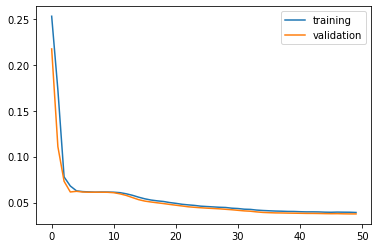

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [0 2 1]
group_bunches: [ 451. 3005.  481.]
group_bunches sorted: [ 451.  481. 3005.]
restore_index: [0 2 1]
group_bunches restored: [ 451. 3005.  481.]
bunch_sorted_index: [2 1 0]
group_bunches: [3262. 2894.  711.]
group_bunches sorted: [ 711. 2894. 3262.]
restore_index: [2 1 0]
group_bunches restored: [3262. 2894.  711.]
bunch_sorted_index: [1 2 0]
group_bunches: [1207.  201.  778.]
group_bunches sorted: [ 201.  778. 1207.]
restore_index: [2 0 1]
group_bunches restored: [1207.  201.  778.]

50/50 [==============================] - 85s 2s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
582   Inst  6276     1     h  7 2017-10-06 17:08:13   
4568  Inst  7464     1     h  7 2018-11-22 02:52:23   
5936  Inst  6362     1     h  7 2017-11-05 00:48:15   
6461  Inst  6255     1     h  7 2017-09-29 18:50:15   
5157  Inst  7266     1     h  7 2018-10-08 02:21:14   

                                                   file  n_bunches  \
582   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...       1868   
4568  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7464/...        376   
5936  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6362/...       1868   
6461  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...       1916   
5157  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7266/...        540   

      bunch_index  bunch_number  ts_length  chunk  
582         225.0         111.0      65536      2  
4568       1212.0         132.0      65536     17  
5936       1756.0         933.0      65536     23  
6461        511.0         281.0      65536     25  
5157        485.0         346.0      65536     20

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 1s/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6709     1     h  7 2018-05-21 00:47:14   
1244  Inst  6390     1     h  7 2017-11-15 15:36:06   
5767  Inst  6694     1     h  7 2018-05-17 14:34:14   
7206  Inst  6687     1     h  7 2018-05-15 16:04:36   
7624  Inst  6709     1     h  7 2018-05-21 00:47:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...       2556   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...        620   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...       2175   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6687/...        780   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
4808       1617.0        1185.0      65536     18  
1244        389.0         173.0      65536      4  
5767       1478.0        1002.0      65536     22  
7206        543.0         378.0      65536     28  
7624       1617.0        1185.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

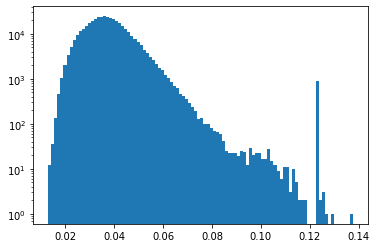

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

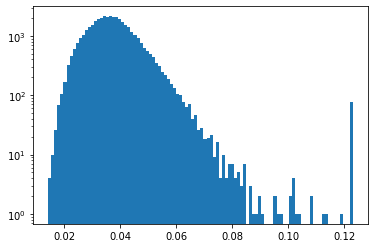

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.059429289551836725
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 17:08:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                    1868
bunch_index                                                   225
bunch_number                                                  111
ts_length                                                   65536
chunk                                                           2
Name: 582, dtype: object


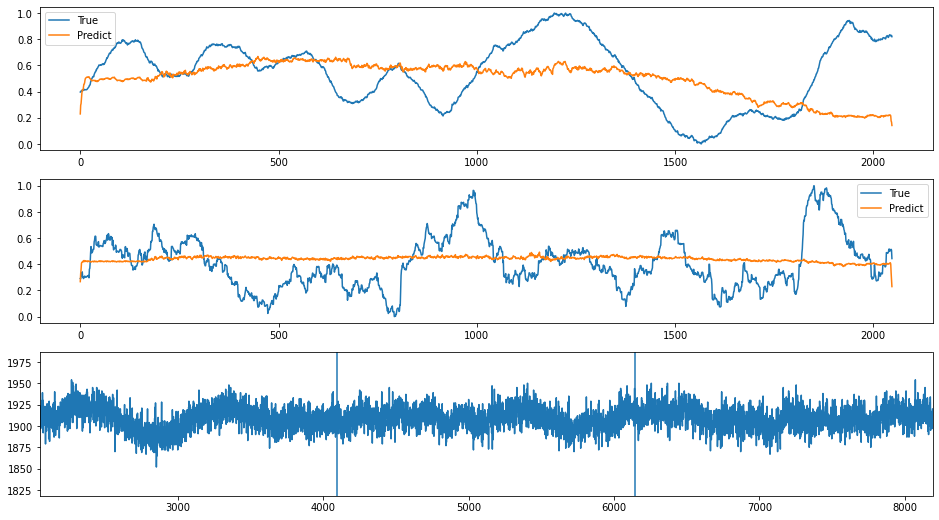

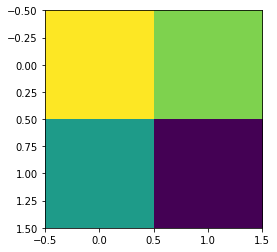

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 278282
Error: 0.01310351346593196
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 07:48:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  2263
bunch_number                                                 1680
ts_length                                                   65536
chunk                                                           2
Name: 656, dtype: object


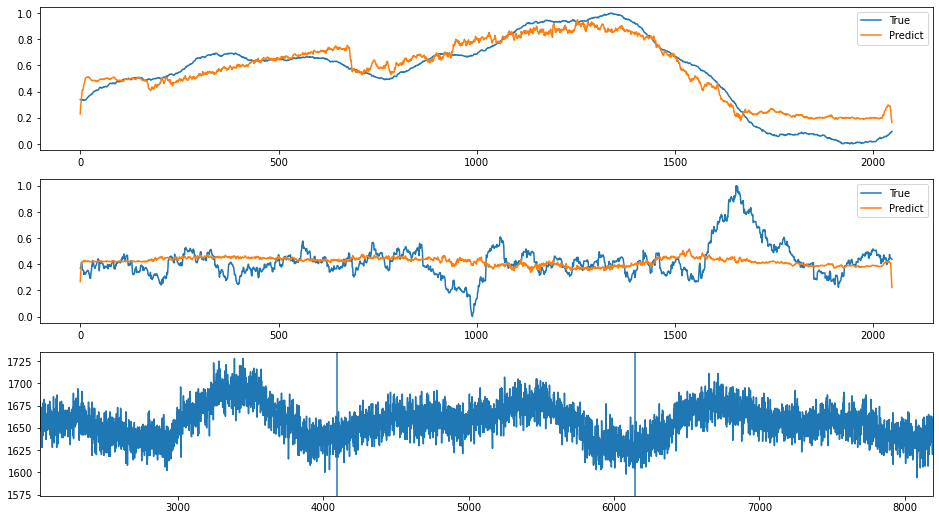

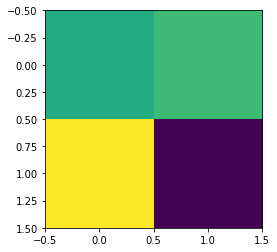

index: 206009
Error: 0.01346446621677741
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 16:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                    1868
bunch_index                                                  1954
bunch_number                                                 1043
ts_length                                                   65536
chunk                                                          17
Name: 4434, dtype: object


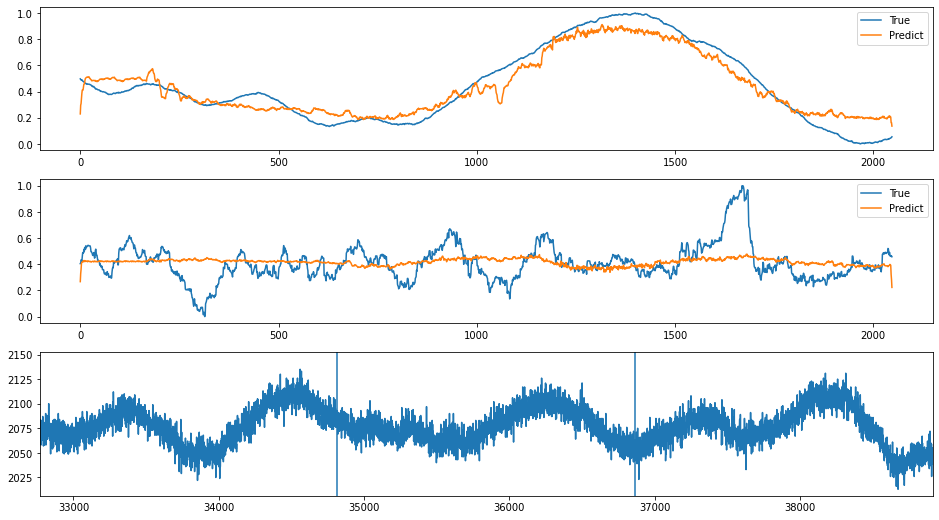

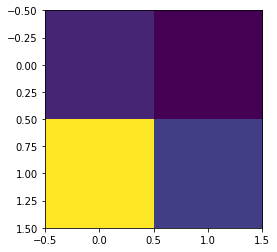

index: 141034
Error: 0.013555052770329035
type                                                         Inst
fill                                                         6890
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 05:34:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...
n_bunches                                                    1452
bunch_index                                                  2238
bunch_number                                                  946
ts_length                                                   65536
chunk                                                          16
Name: 4229, dtype: object


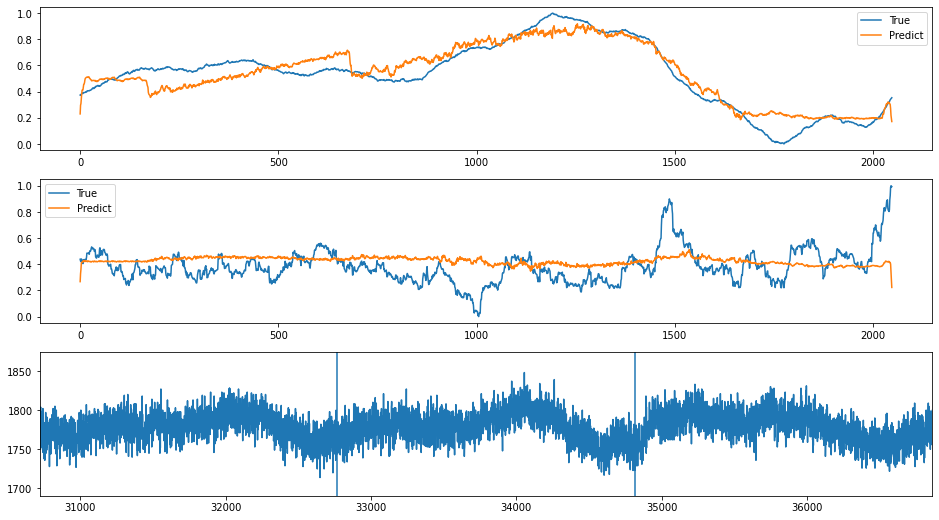

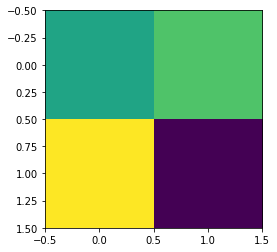

index: 371798
Error: 0.013996732882586708
type                                                         Inst
fill                                                         6709
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 23:44:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6709/...
n_bunches                                                    2556
bunch_index                                                  1692
bunch_number                                                 1225
ts_length                                                   65536
chunk                                                          25
Name: 6582, dtype: object


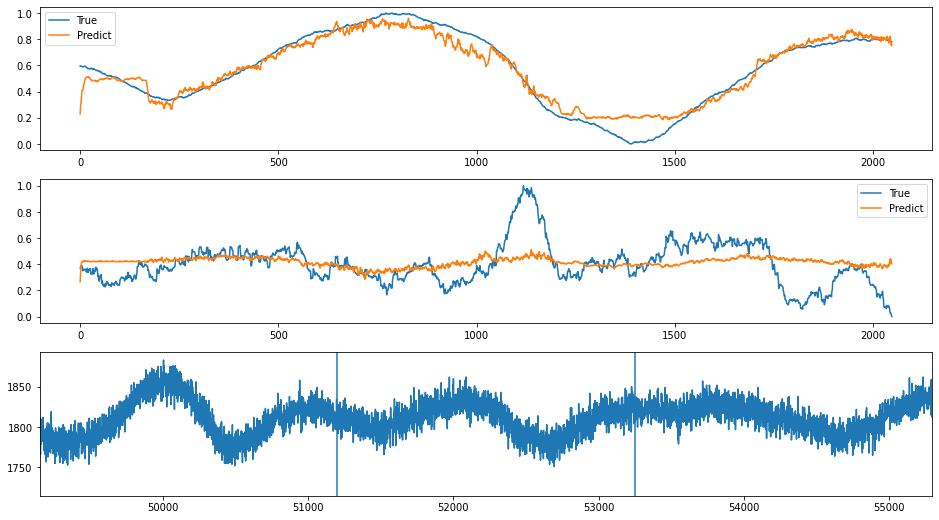

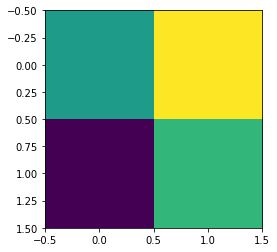

index: 148533
Error: 0.014046167367462106
type                                                         Inst
fill                                                         6694
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-17 09:47:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6694/...
n_bunches                                                    2175
bunch_index                                                   270
bunch_number                                                  170
ts_length                                                   65536
chunk                                                          13
Name: 3361, dtype: object


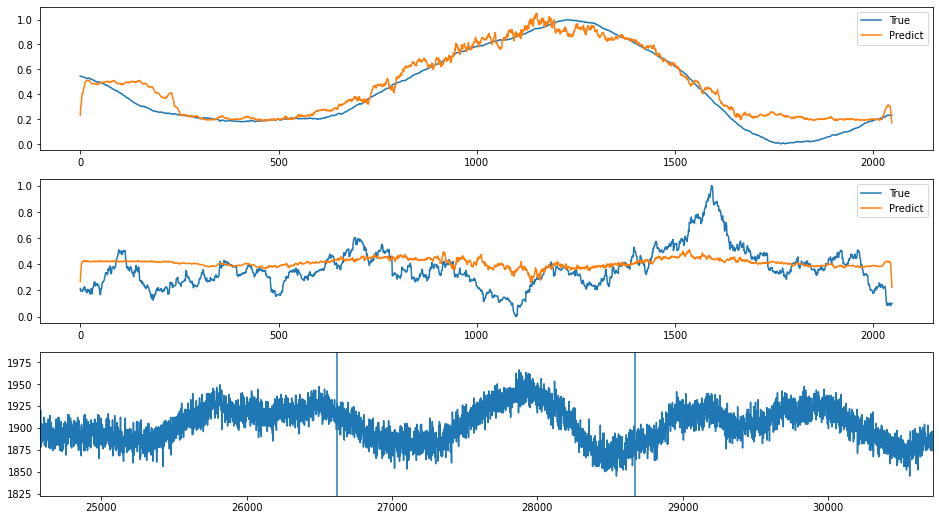

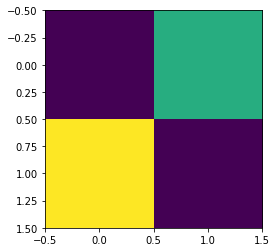

index: 303002
Error: 0.014051804223645818
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 02:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  1816
bunch_number                                                 1330
ts_length                                                   65536
chunk                                                          19
Name: 4882, dtype: object


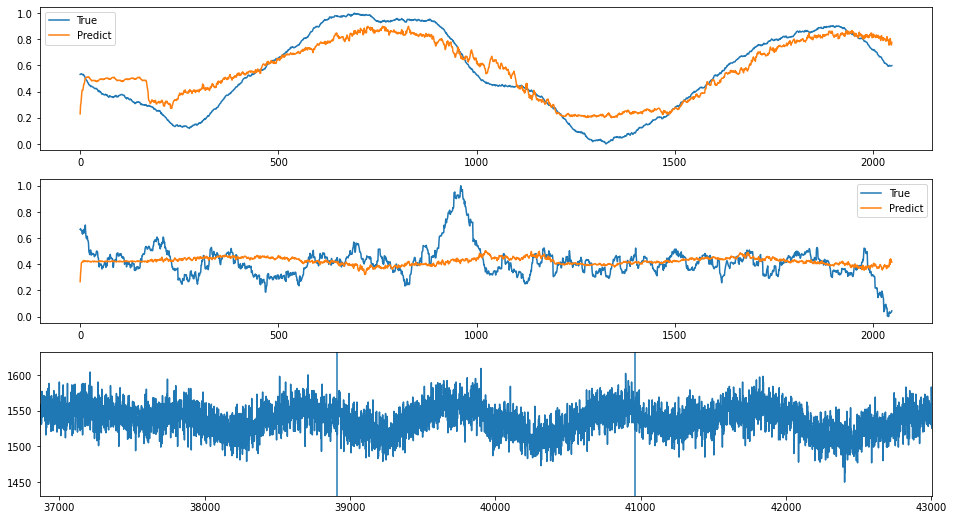

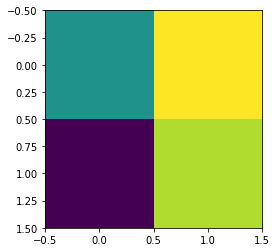

index: 40348
Error: 0.014054253867091852
type                                                         Inst
fill                                                         6923
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 20:55:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6923/...
n_bunches                                                    2556
bunch_index                                                   914
bunch_number                                                  650
ts_length                                                   65536
chunk                                                          15
Name: 3912, dtype: object


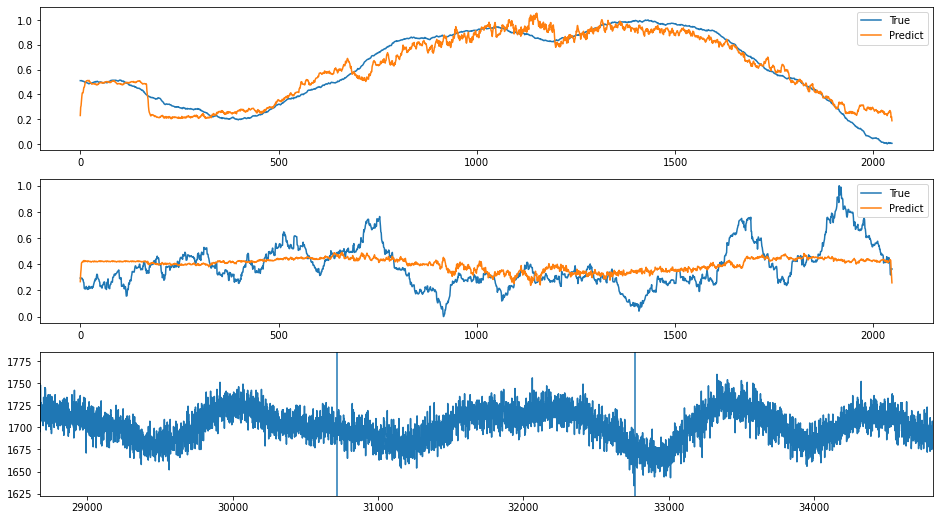

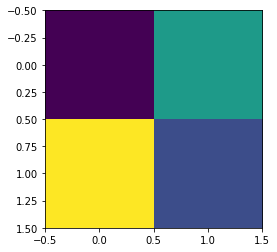

index: 161386
Error: 0.014067207413016867
type                                                         Inst
fill                                                         6890
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 09:30:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6890/...
n_bunches                                                    1452
bunch_index                                                  1014
bunch_number                                                  424
ts_length                                                   65536
chunk                                                          17
Name: 4354, dtype: object


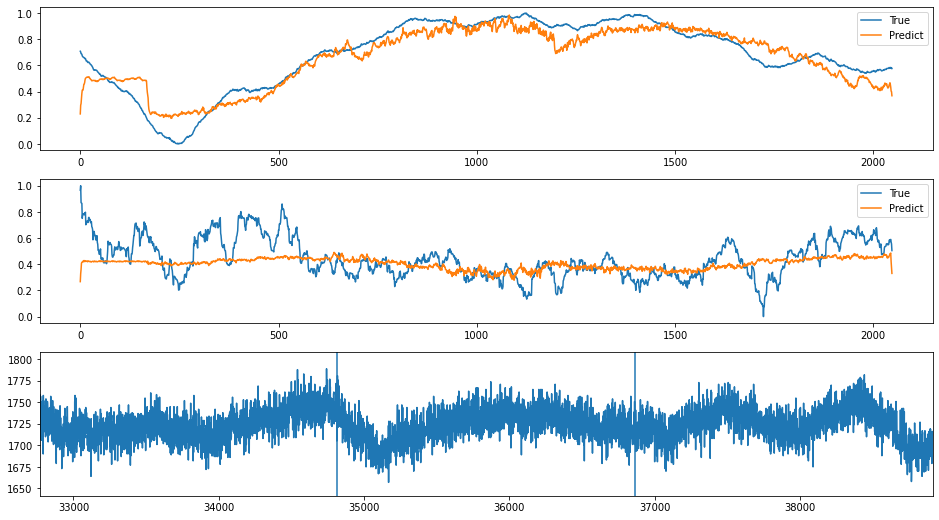

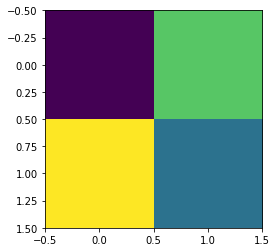

index: 107298
Error: 0.014120245686604934
type                                                         Inst
fill                                                         6700
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-19 13:12:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6700/...
n_bunches                                                    2556
bunch_index                                                   332
bunch_number                                                  212
ts_length                                                   65536
chunk                                                          17
Name: 4546, dtype: object


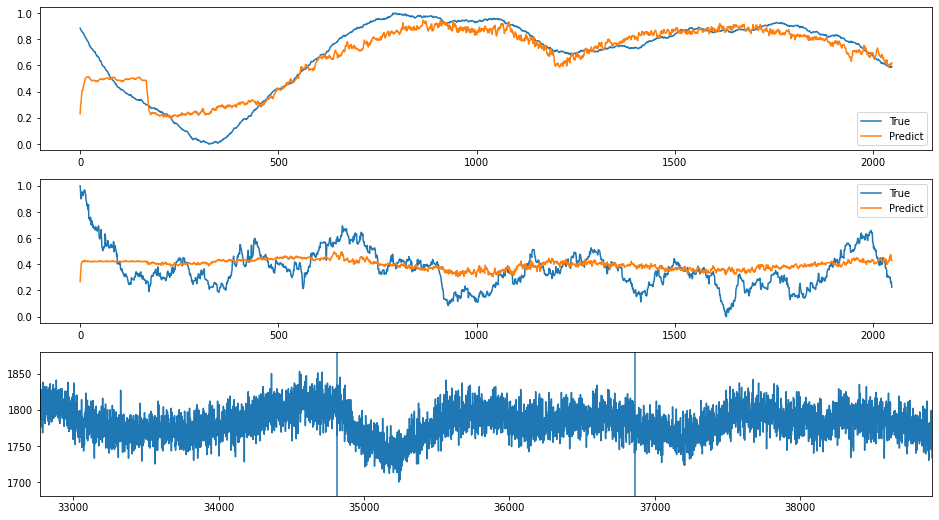

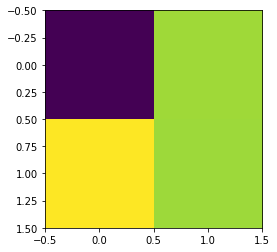

index: 156124
Error: 0.01414823429636348
type                                                         Inst
fill                                                         6594
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 13:43:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6594/...
n_bunches                                                     339
bunch_index                                                  2741
bunch_number                                                  275
ts_length                                                   65536
chunk                                                          14
Name: 3618, dtype: object


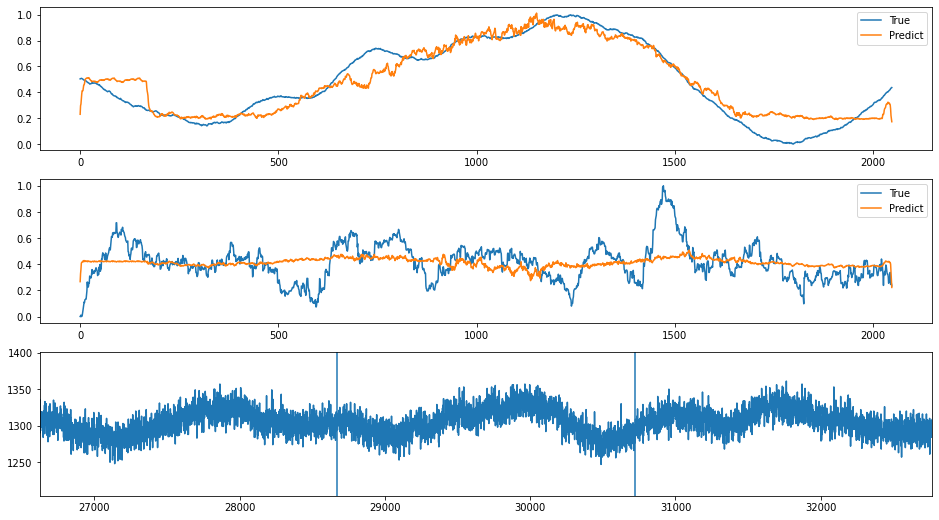

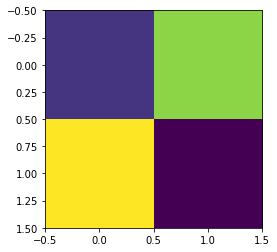

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 86759
Error: 0.13751550385359207
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 06:58:22
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                   910
bunch_number                                                   39
ts_length                                                   65536
chunk                                                          14
Name: 3611, dtype: object


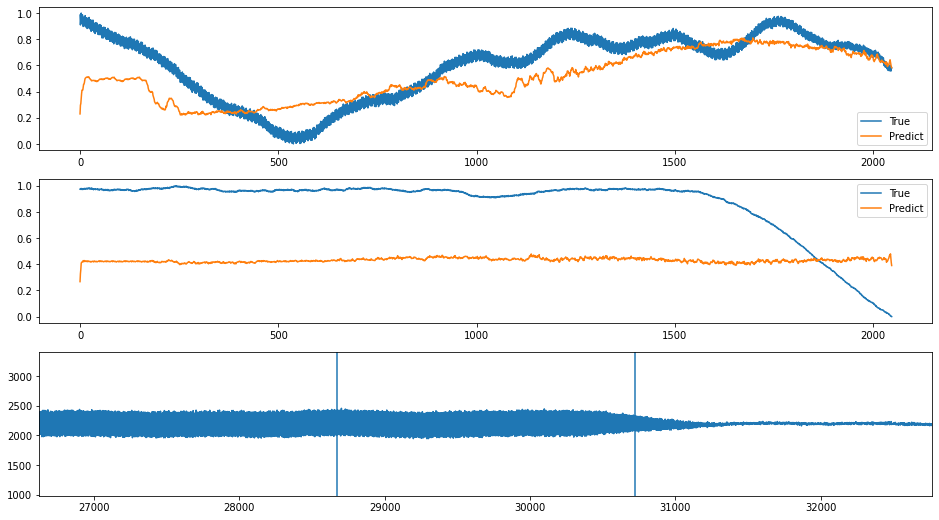

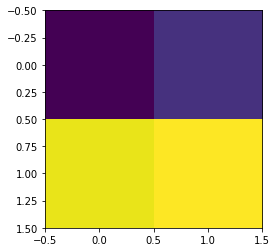

index: 53939
Error: 0.12918204527196278
type                                                         Inst
fill                                                         6371
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-09 14:00:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6371/...
n_bunches                                                     524
bunch_index                                                   932
bunch_number                                                  497
ts_length                                                   65536
chunk                                                           5
Name: 1307, dtype: object


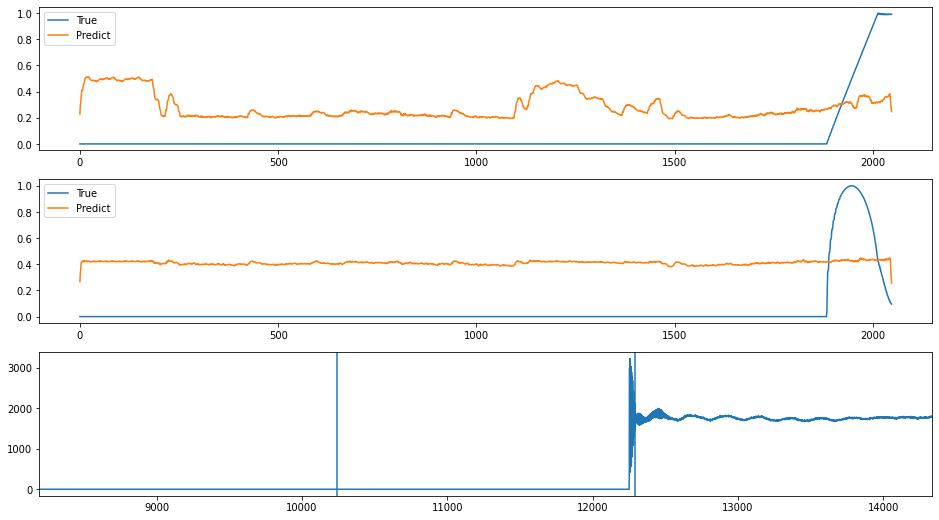

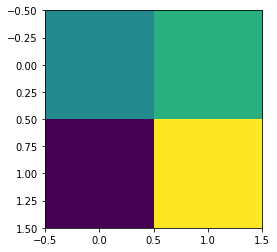

index: 163836
Error: 0.12682727063660337
type                                                         Inst
fill                                                         7470
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-24 09:56:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7470/...
n_bunches                                                     502
bunch_index                                                  2354
bunch_number                                                  500
ts_length                                                   65536
chunk                                                           8
Name: 2271, dtype: object


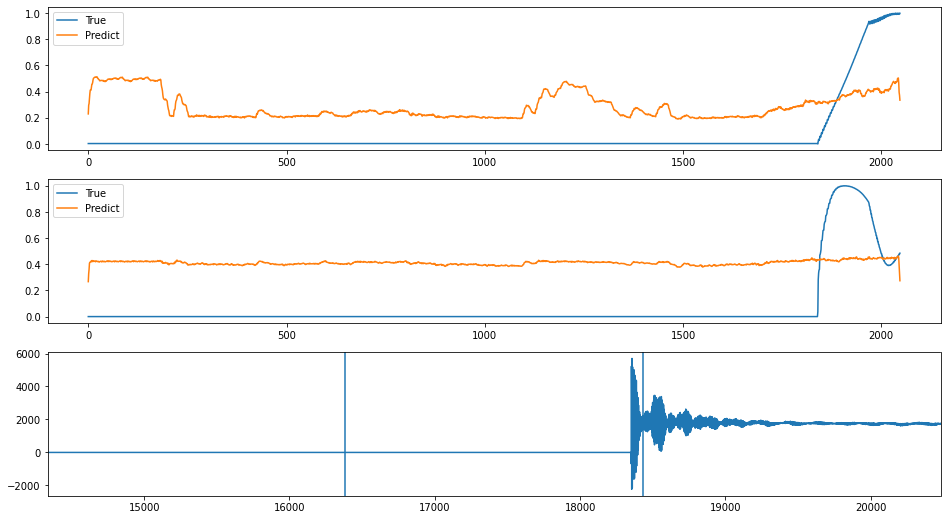

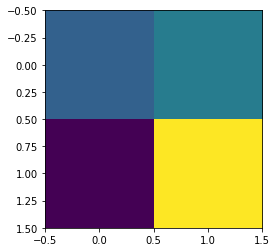

index: 29551
Error: 0.12614461707981045
type                                                         Inst
fill                                                         6392
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 05:13:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6392/...
n_bunches                                                     140
bunch_index                                                   214
bunch_number                                                   79
ts_length                                                   65536
chunk                                                           1
Name: 442, dtype: object


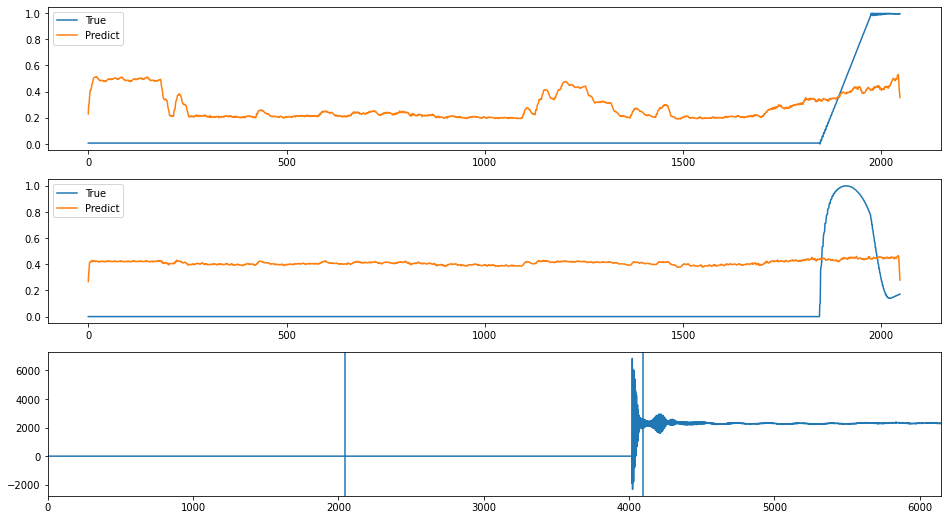

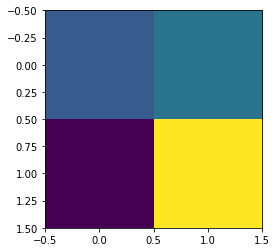

index: 18193
Error: 0.12558362041259494
type                                                         Inst
fill                                                         6253
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-28 13:01:57
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6253/...
n_bunches                                                     460
bunch_index                                                   819
bunch_number                                                  445
ts_length                                                   65536
chunk                                                           2
Name: 556, dtype: object


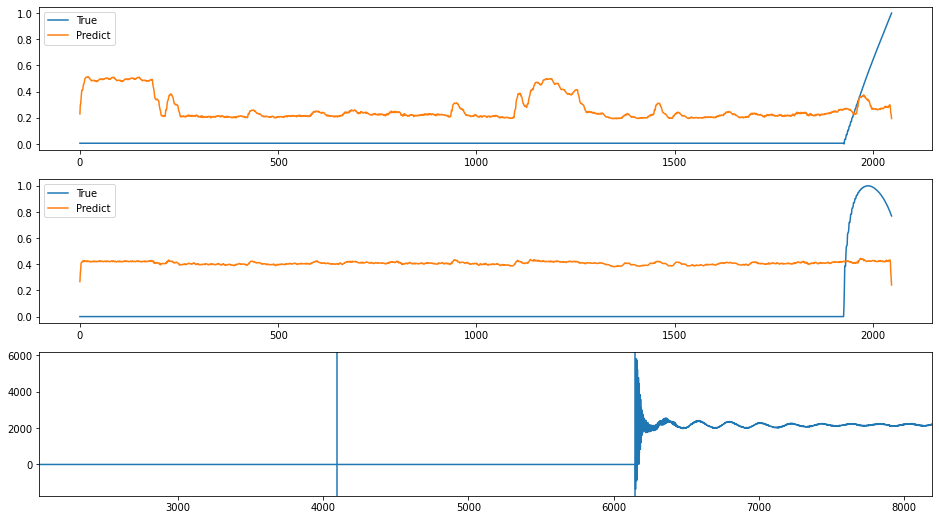

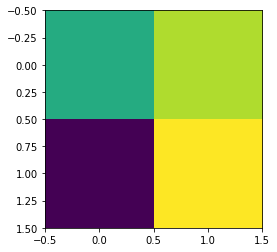

index: 206309
Error: 0.12551998573280118
type                                                         Inst
fill                                                         6357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 15:35:03
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6357/...
n_bunches                                                     428
bunch_index                                                   667
bunch_number                                                  360
ts_length                                                   65536
chunk                                                           5
Name: 1503, dtype: object


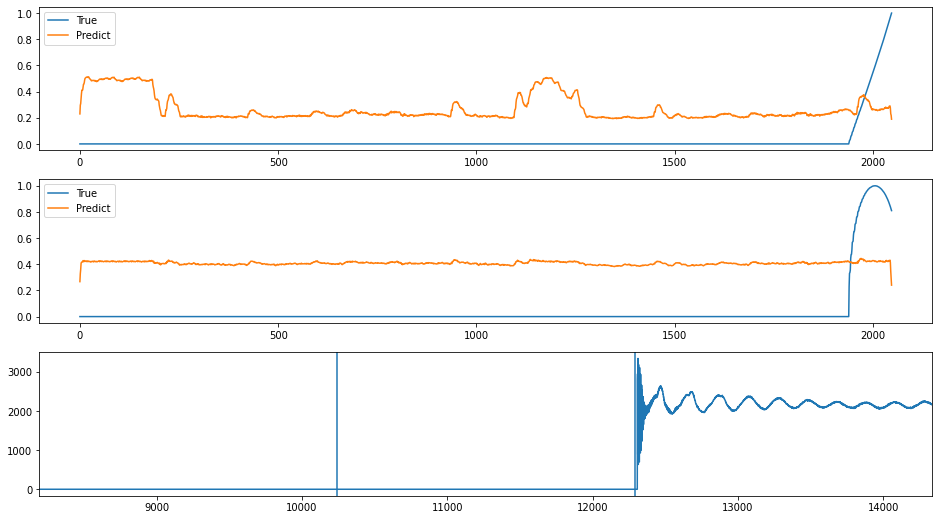

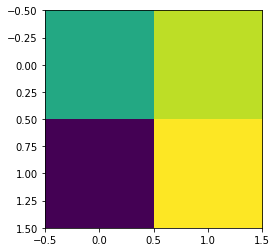

index: 159692
Error: 0.12400023591574853
type                                                         Inst
fill                                                         6382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 15:40:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6382/...
n_bunches                                                     652
bunch_index                                                  1557
bunch_number                                                  608
ts_length                                                   65536
chunk                                                           4
Name: 1100, dtype: object


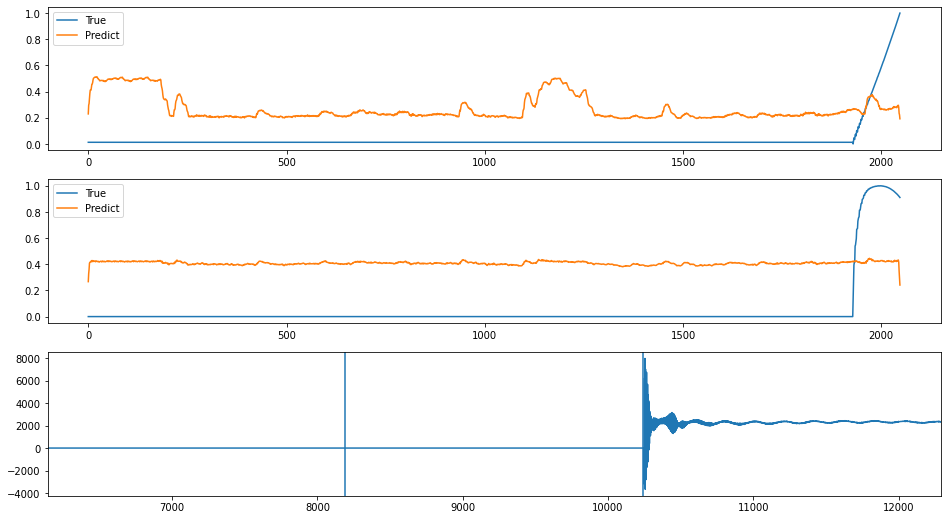

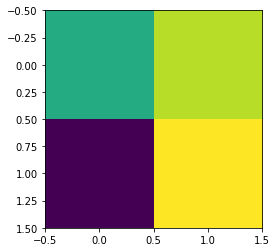

index: 54989
Error: 0.12383101595505308
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 18:18:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                     108
bunch_index                                                   202
bunch_number                                                  102
ts_length                                                   65536
chunk                                                           2
Name: 592, dtype: object


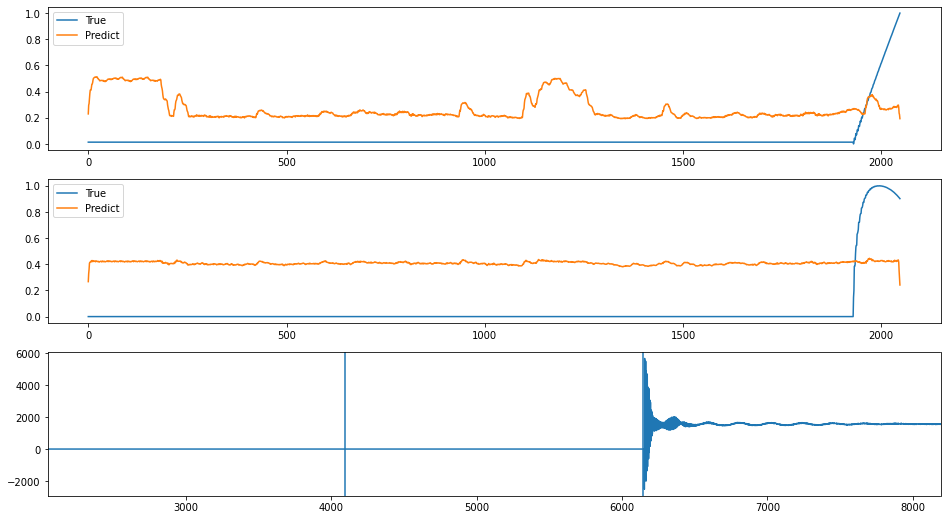

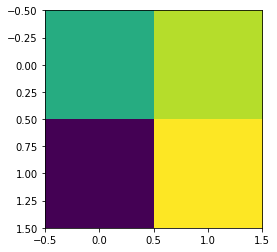

index: 303540
Error: 0.1232781495966368
type                                                         Inst
fill                                                         6398
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-19 21:07:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6398/...
n_bunches                                                     524
bunch_index                                                  1079
bunch_number                                                  448
ts_length                                                   65536
chunk                                                           3
Name: 851, dtype: object


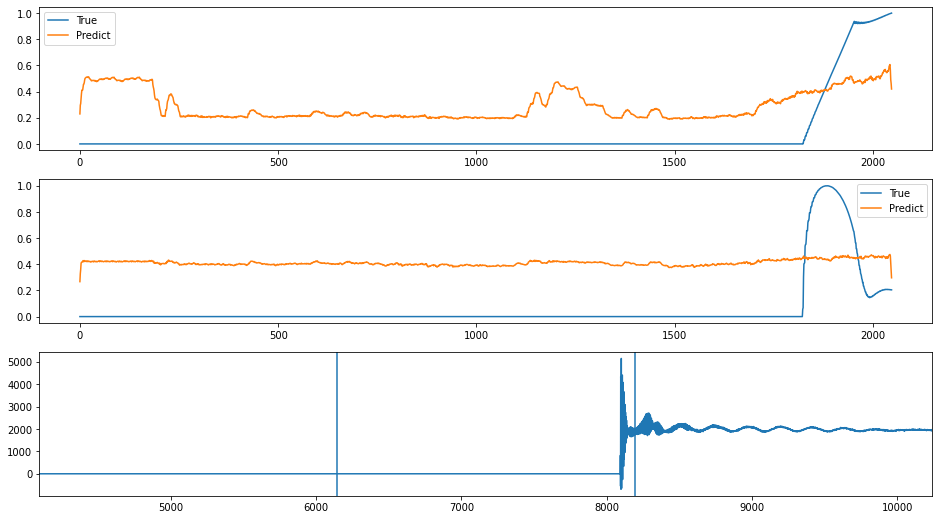

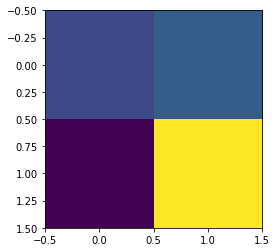

index: 316477
Error: 0.12324769170663141
type                                                         Inst
fill                                                         6269
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-04 03:54:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6269/...
n_bunches                                                     492
bunch_index                                                   866
bunch_number                                                  452
ts_length                                                   65536
chunk                                                           3
Name: 875, dtype: object


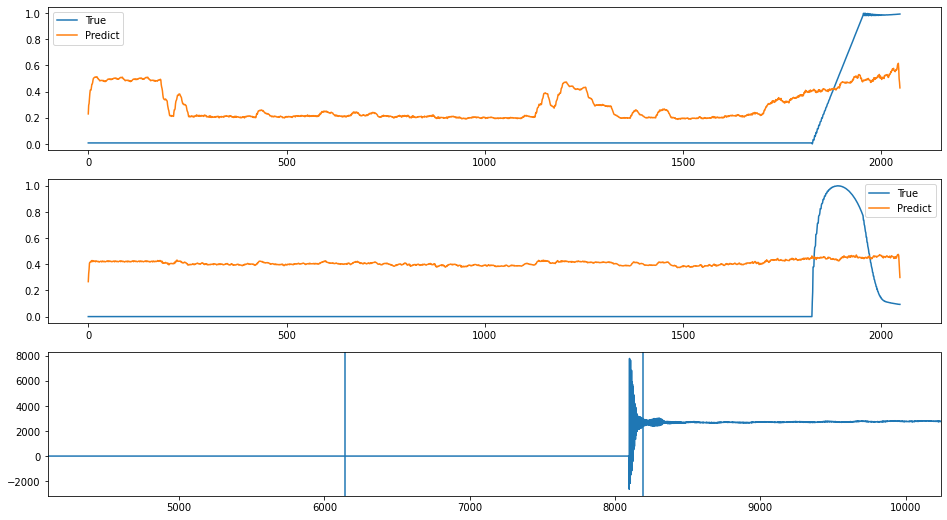

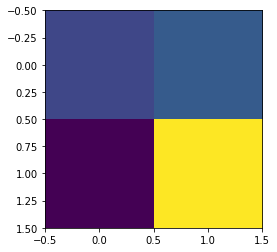

index: 391231
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6276
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 13:16:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6276/...
n_bunches                                                     908
bunch_index                                                  1587
bunch_number                                                  863
ts_length                                                   65536
chunk                                                           3
Name: 932, dtype: object


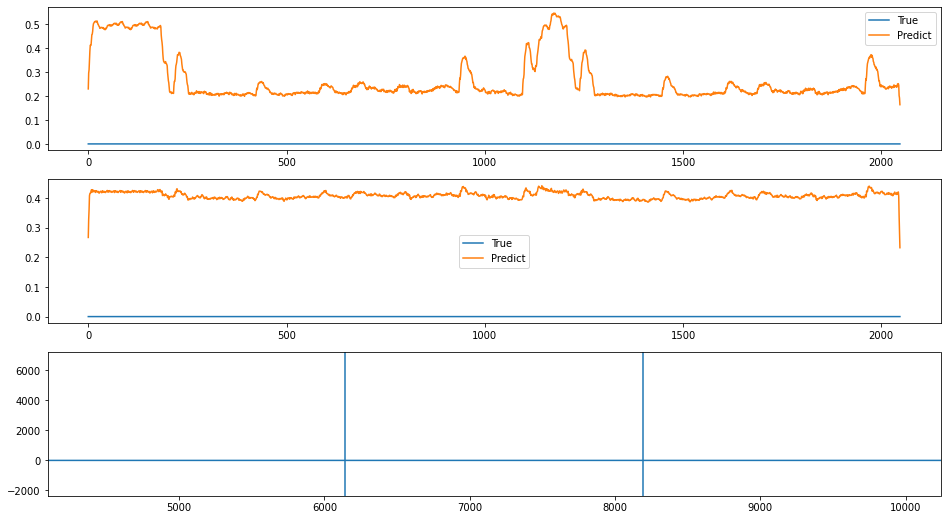

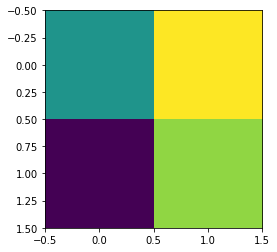

index: 141915
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          12
Name: 3127, dtype: object


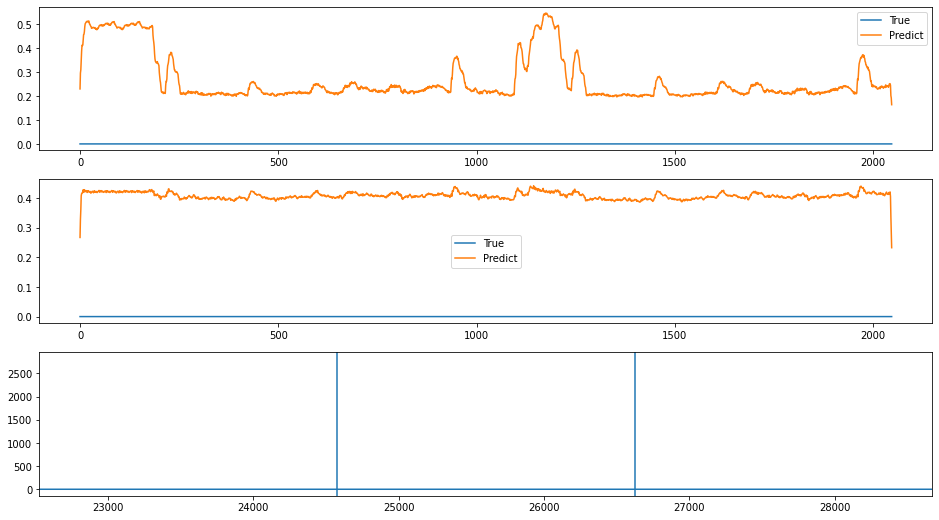

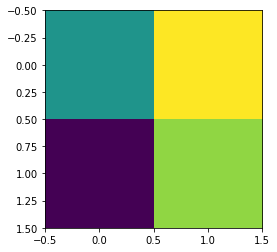

index: 163130
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 15:40:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6382/...
n_bunches                                                     652
bunch_index                                                  1557
bunch_number                                                  608
ts_length                                                   65536
chunk                                                           1
Name: 332, dtype: object


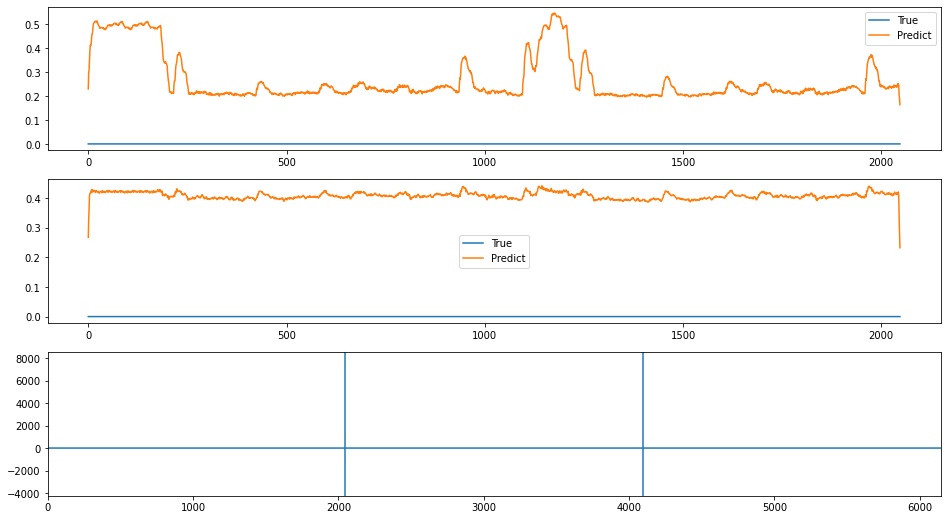

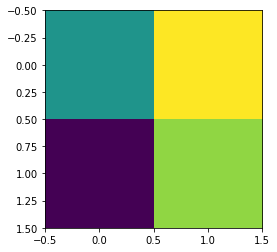

index: 18402
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:35:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     620
bunch_index                                                  1029
bunch_number                                                  513
ts_length                                                   65536
chunk                                                           2
Name: 566, dtype: object


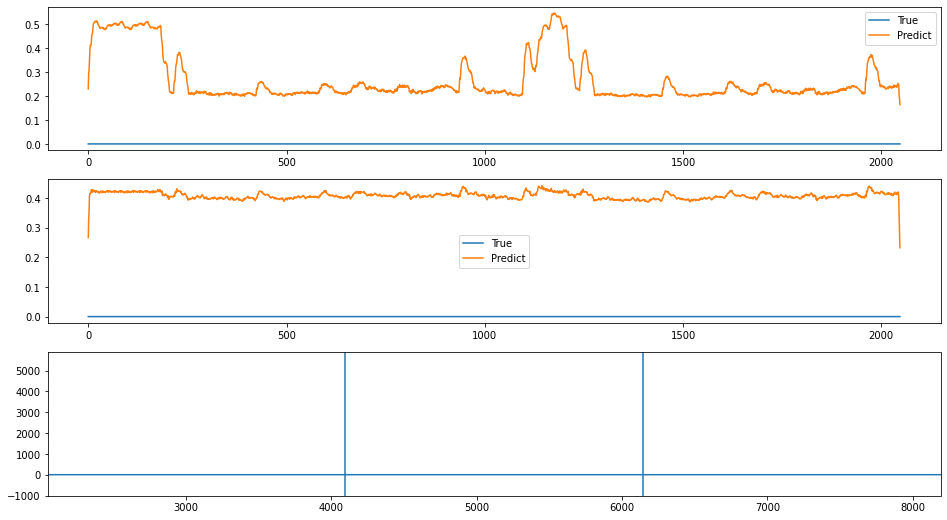

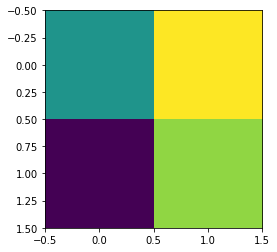

index: 141071
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          25
Name: 6455, dtype: object


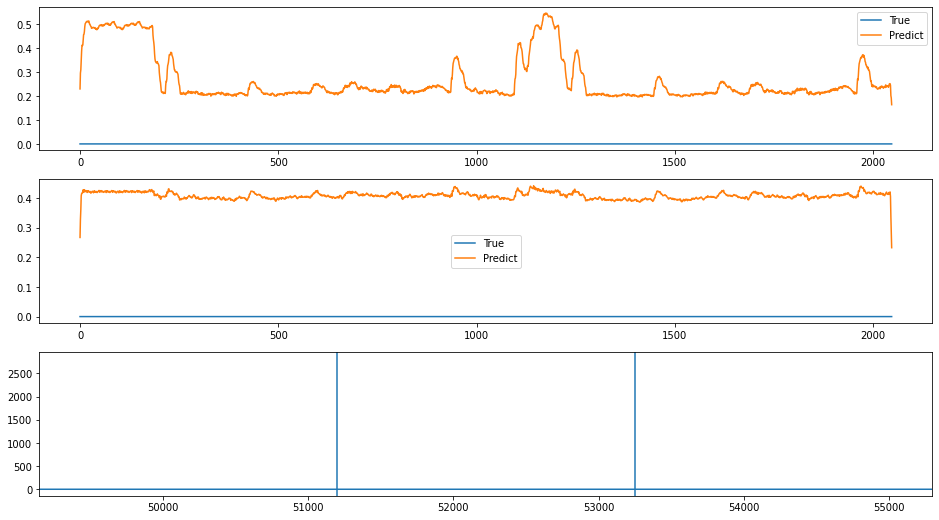

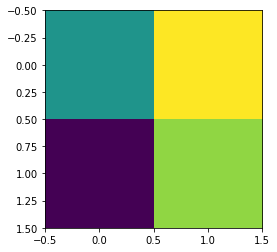

index: 4188
Error: 0.12307249981332502
type                                                         Inst
fill                                                         7346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 08:01:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...
n_bunches                                                     780
bunch_index                                                  1049
bunch_number                                                  771
ts_length                                                   65536
chunk                                                          16
Name: 4109, dtype: object


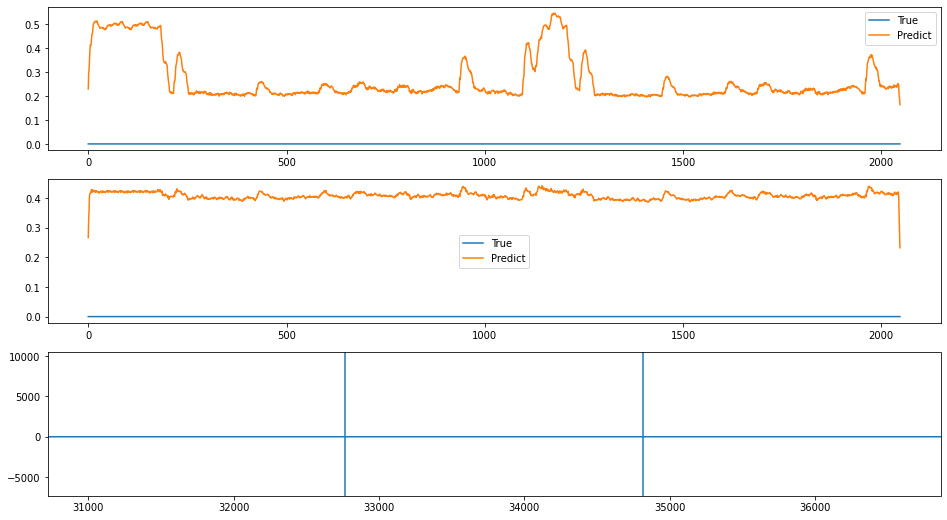

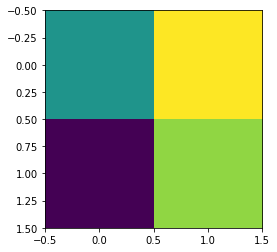

index: 142189
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          28
Name: 7223, dtype: object


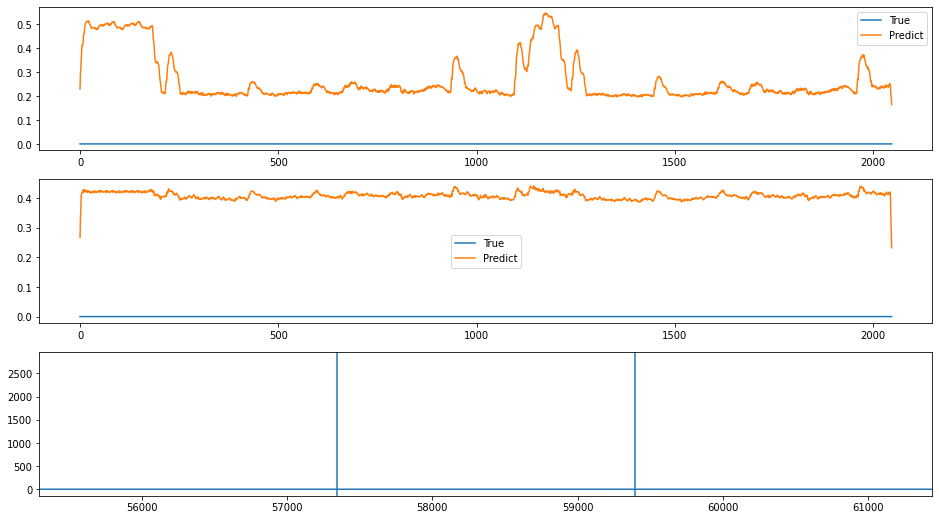

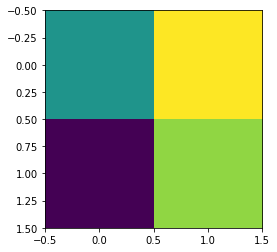

index: 142255
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          14
Name: 3639, dtype: object


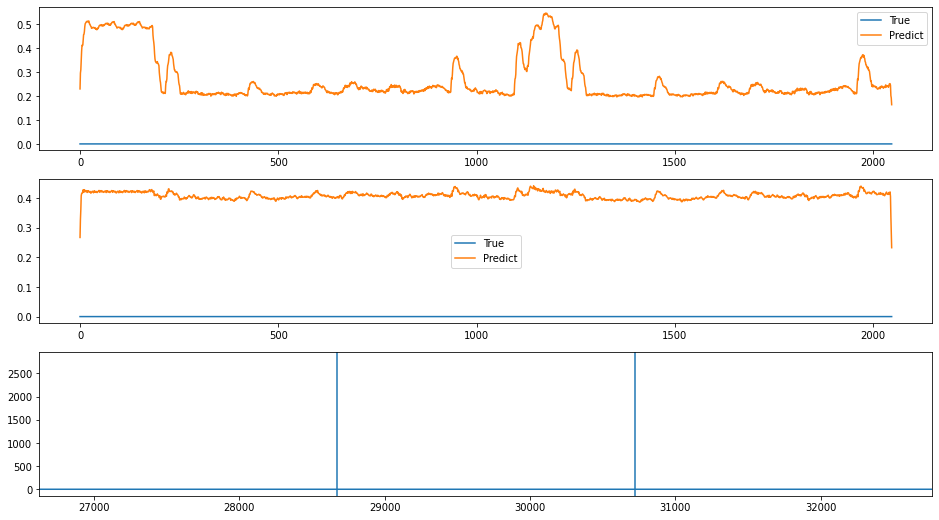

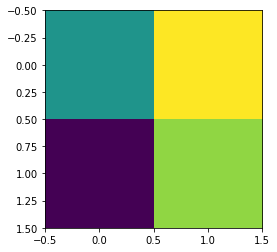

index: 391270
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1410
bunch_number                                                 1023
ts_length                                                   65536
chunk                                                          15
Name: 3975, dtype: object


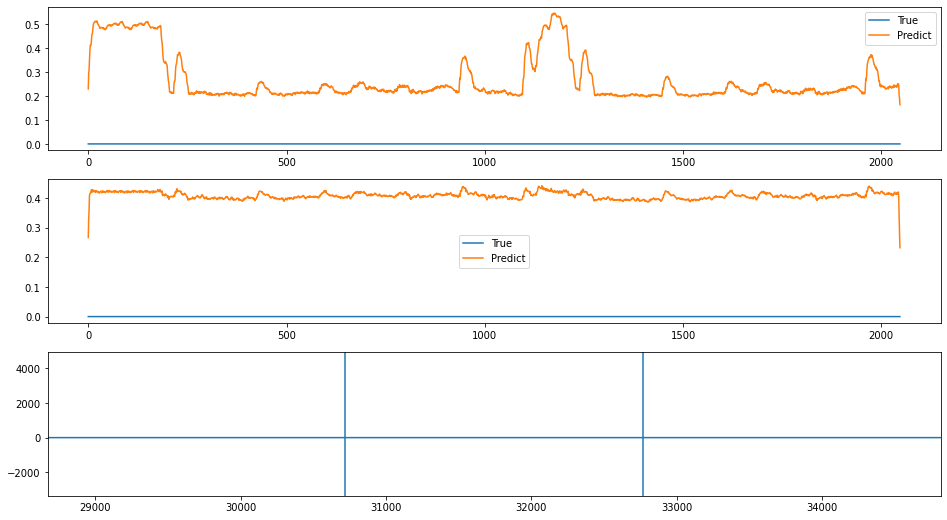

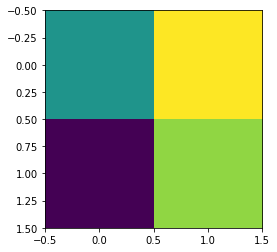

index: 141281
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          15
Name: 3895, dtype: object


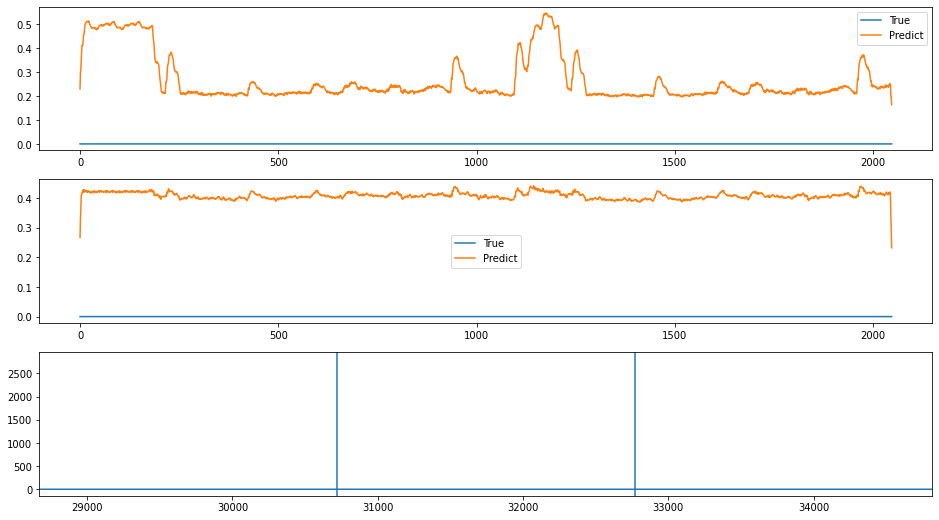

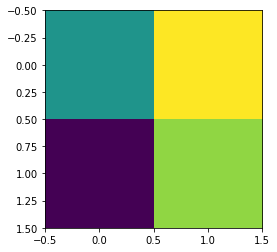

index: 391204
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1410
bunch_number                                                 1023
ts_length                                                   65536
chunk                                                          22
Name: 5767, dtype: object


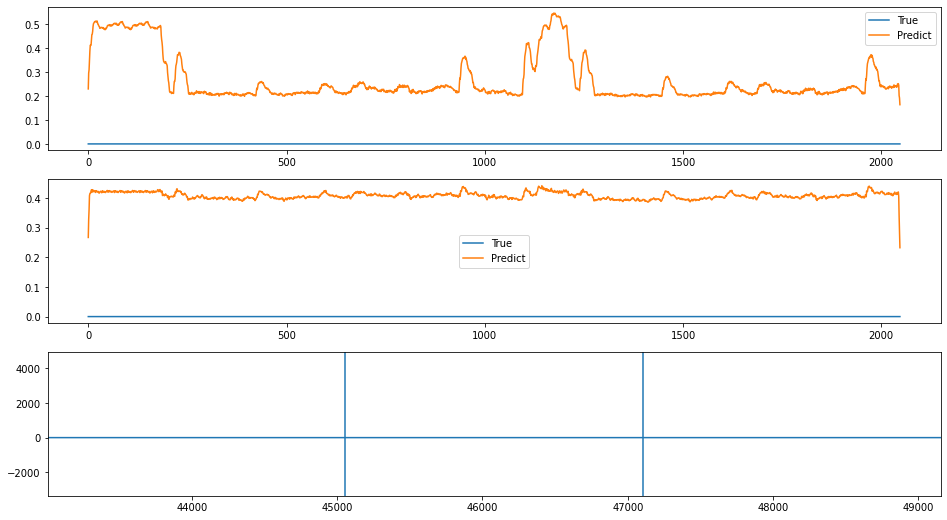

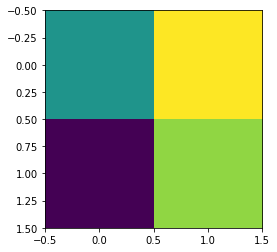

index: 370381
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6752
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-02 11:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...
n_bunches                                                     540
bunch_index                                                   648
bunch_number                                                  445
ts_length                                                   65536
chunk                                                          17
Name: 4545, dtype: object


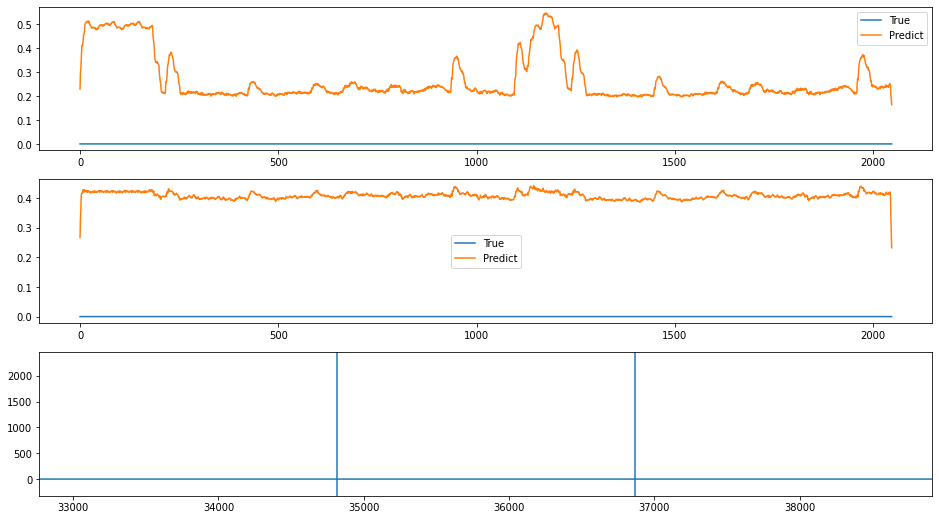

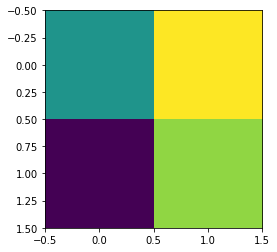

index: 142605
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          26
Name: 6711, dtype: object


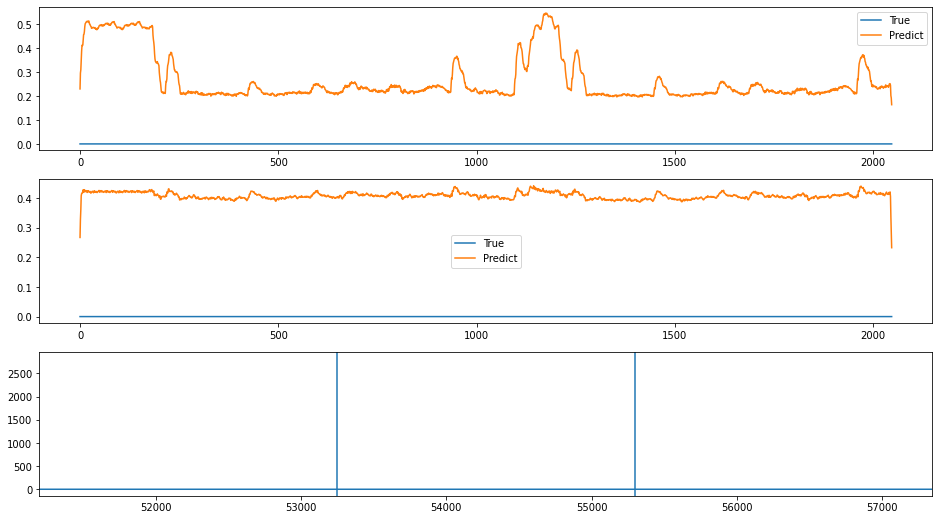

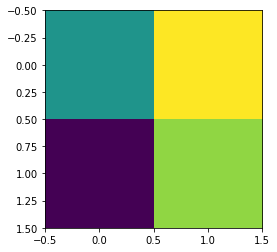

index: 140170
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          18
Name: 4663, dtype: object


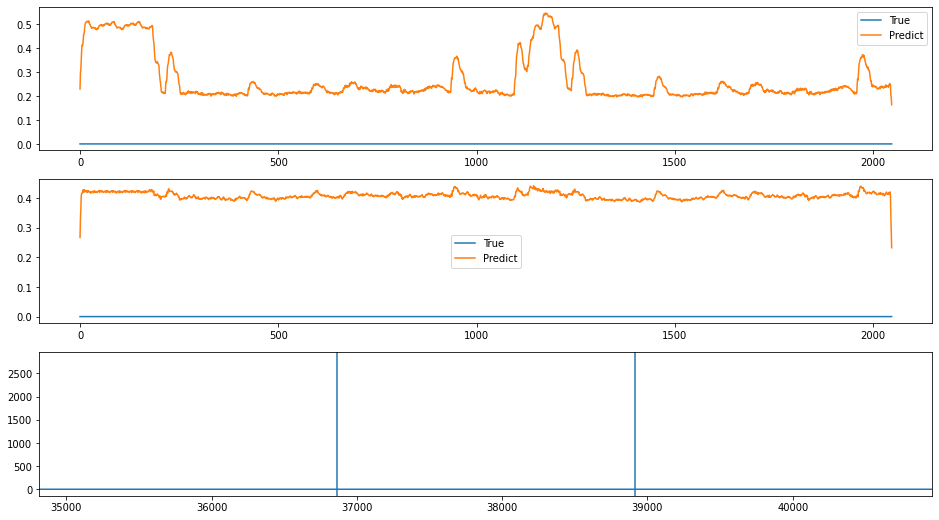

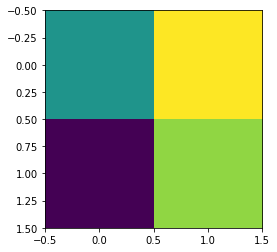

index: 139978
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          23
Name: 5943, dtype: object


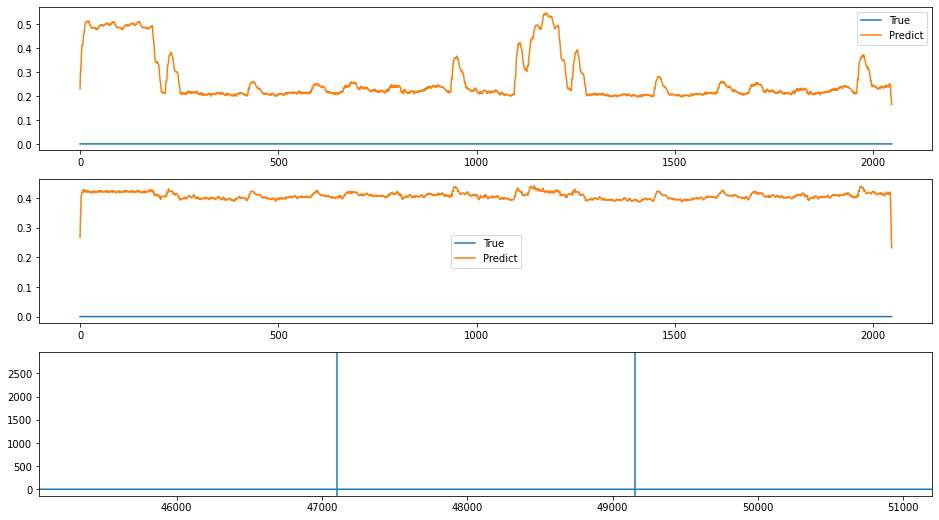

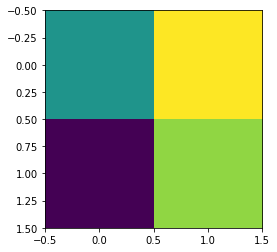

index: 370199
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:45:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     156
bunch_index                                                   125
bunch_number                                                   63
ts_length                                                   65536
chunk                                                           6
Name: 1631, dtype: object


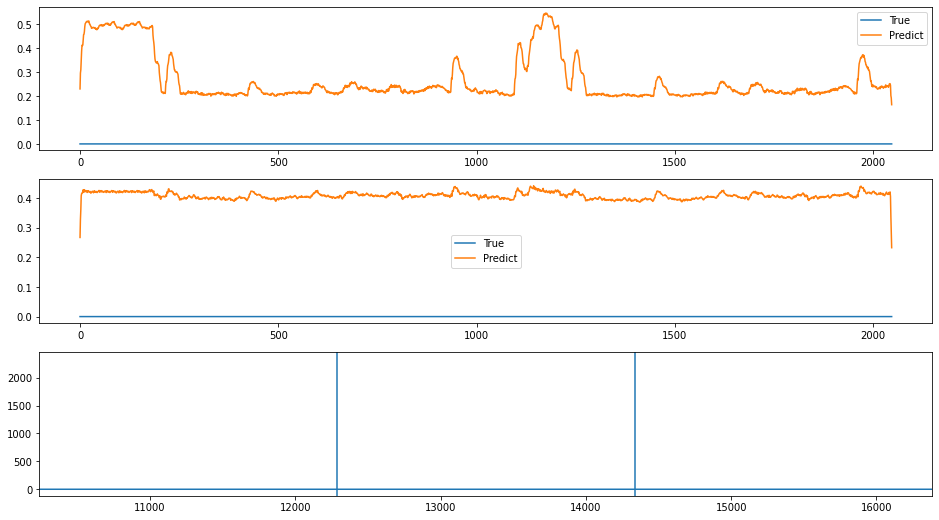

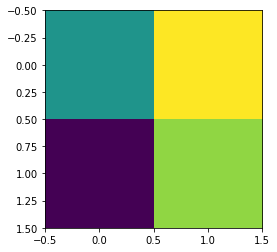

index: 370179
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6898
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 00:45:36
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6898/...
n_bunches                                                     156
bunch_index                                                   125
bunch_number                                                   63
ts_length                                                   65536
chunk                                                          22
Name: 5727, dtype: object


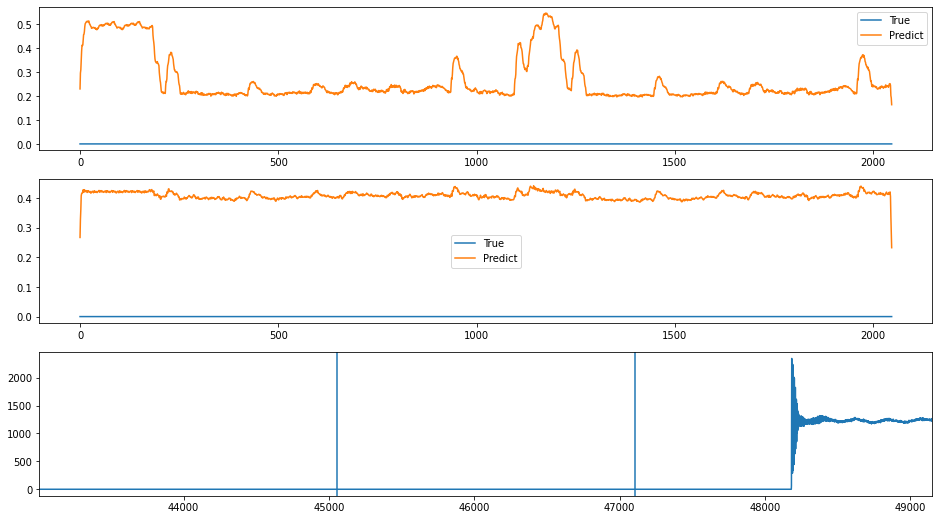

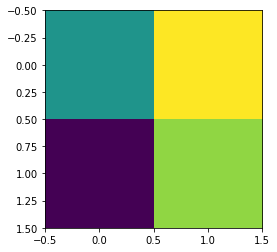

index: 283930
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:23:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1132
bunch_index                                                  2038
bunch_number                                                 1096
ts_length                                                   65536
chunk                                                           5
Name: 1471, dtype: object


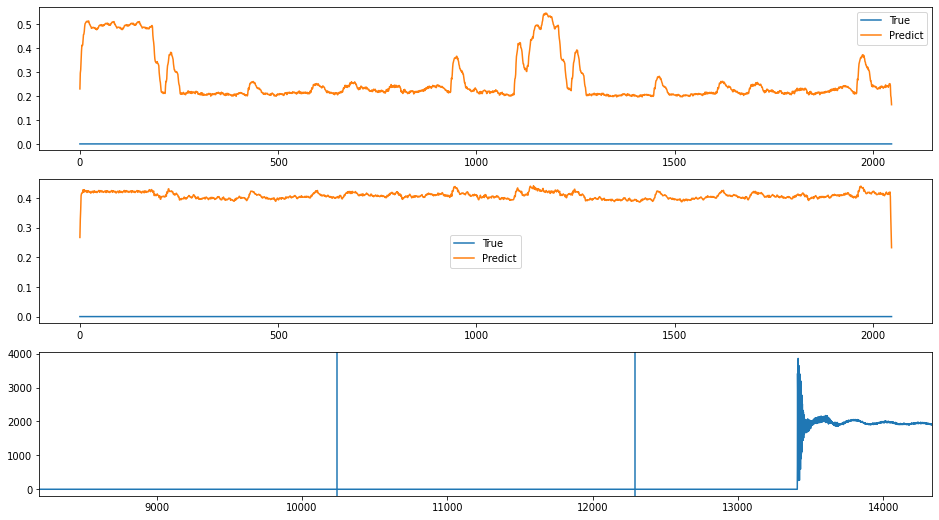

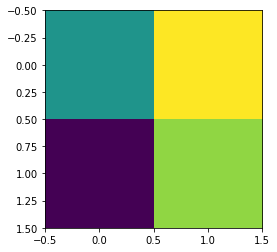

index: 87493
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6598
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 12:10:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6598/...
n_bunches                                                     516
bunch_index                                                   486
bunch_number                                                  380
ts_length                                                   65536
chunk                                                           4
Name: 1067, dtype: object


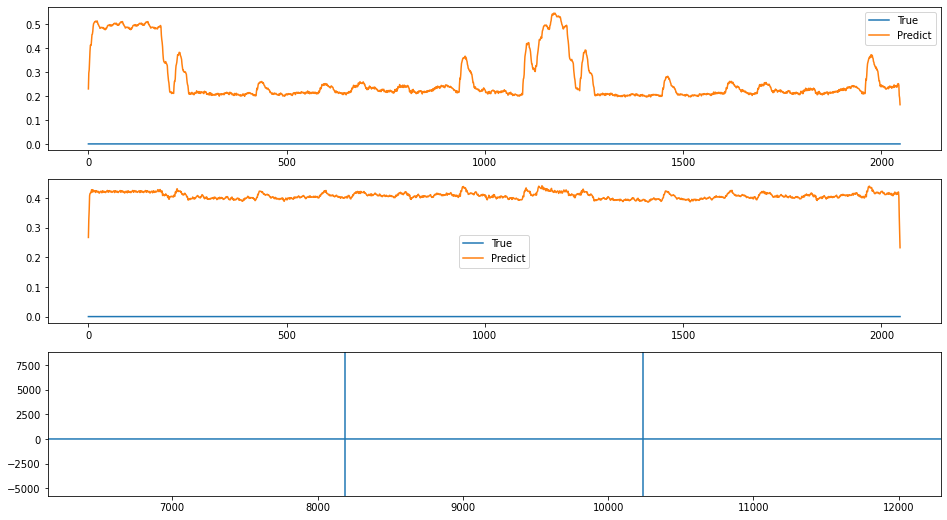

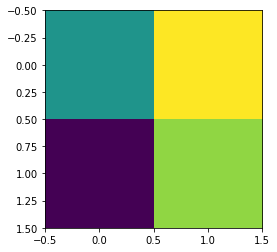

index: 18630
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:35:30
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     620
bunch_index                                                  1029
bunch_number                                                  513
ts_length                                                   65536
chunk                                                           4
Name: 1078, dtype: object


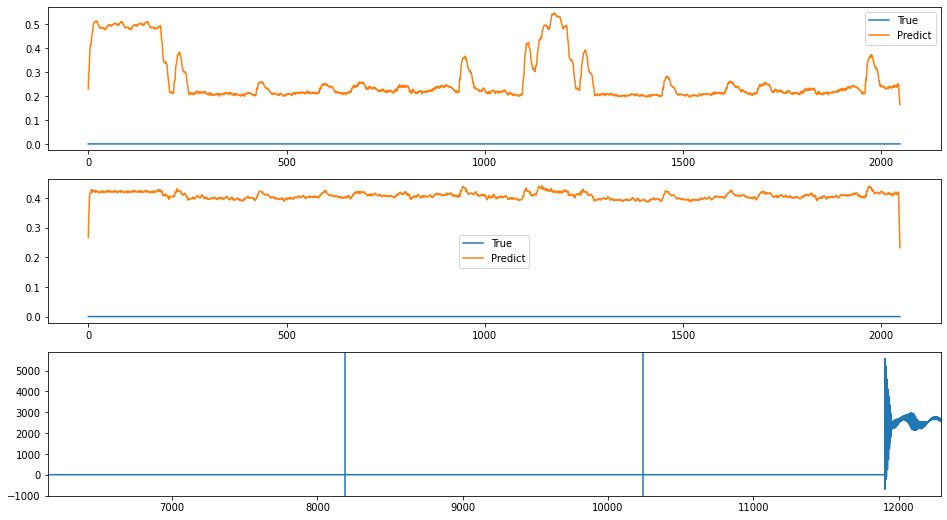

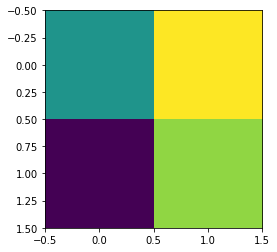

index: 25000
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6594
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 08:22:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6594/...
n_bunches                                                     157
bunch_index                                                  1133
bunch_number                                                  145
ts_length                                                   65536
chunk                                                          11
Name: 2952, dtype: object


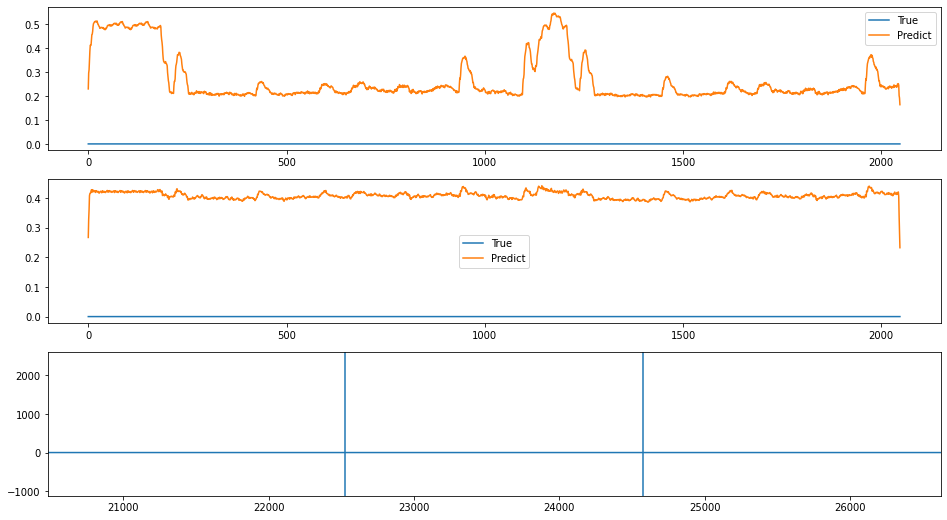

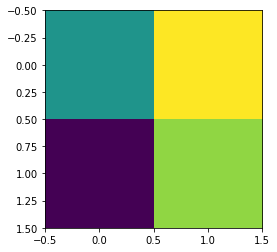

index: 370619
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6752
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-02 11:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...
n_bunches                                                     540
bunch_index                                                   648
bunch_number                                                  445
ts_length                                                   65536
chunk                                                           8
Name: 2241, dtype: object


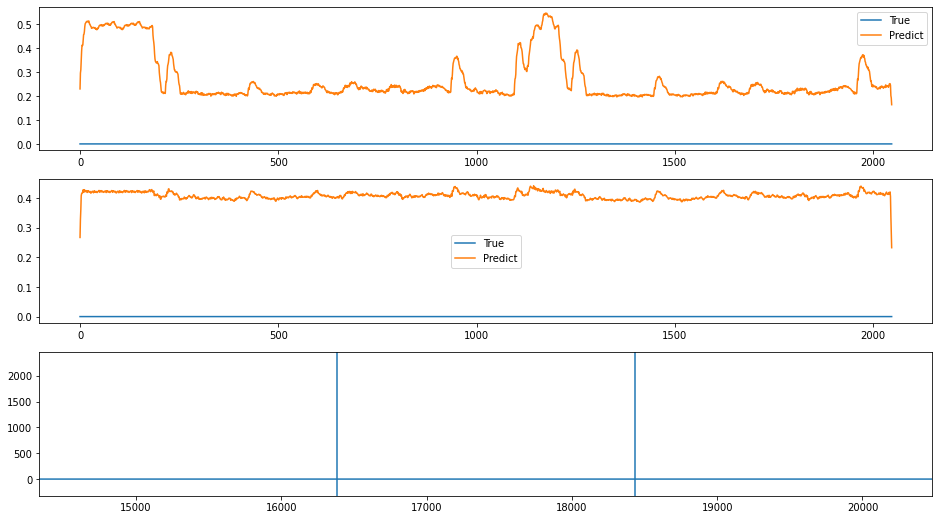

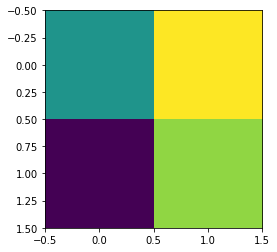

index: 353061
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                     588
bunch_index                                                  1130
bunch_number                                                  467
ts_length                                                   65536
chunk                                                           1
Name: 367, dtype: object


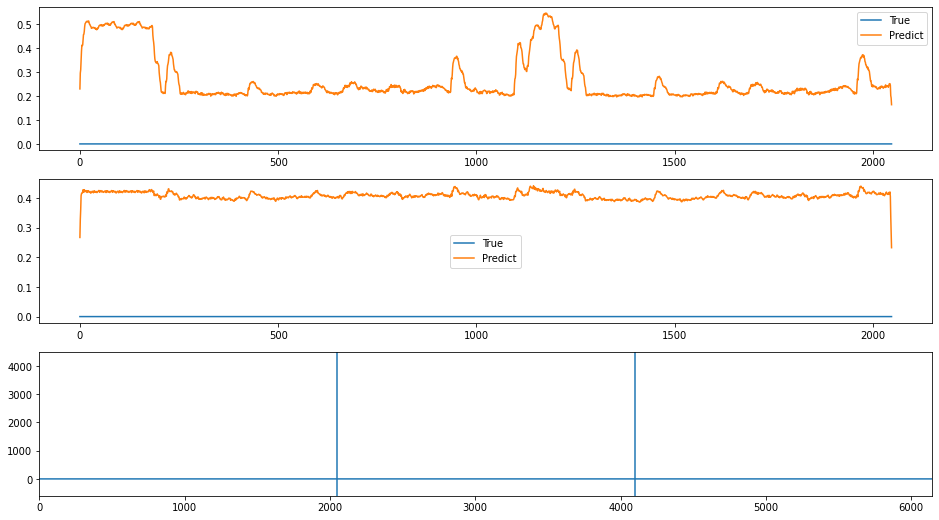

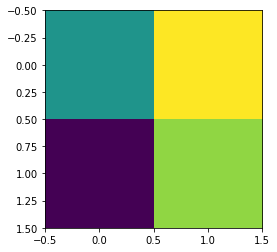

index: 142618
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  2382
bunch_number                                                  503
ts_length                                                   65536
chunk                                                          20
Name: 5175, dtype: object


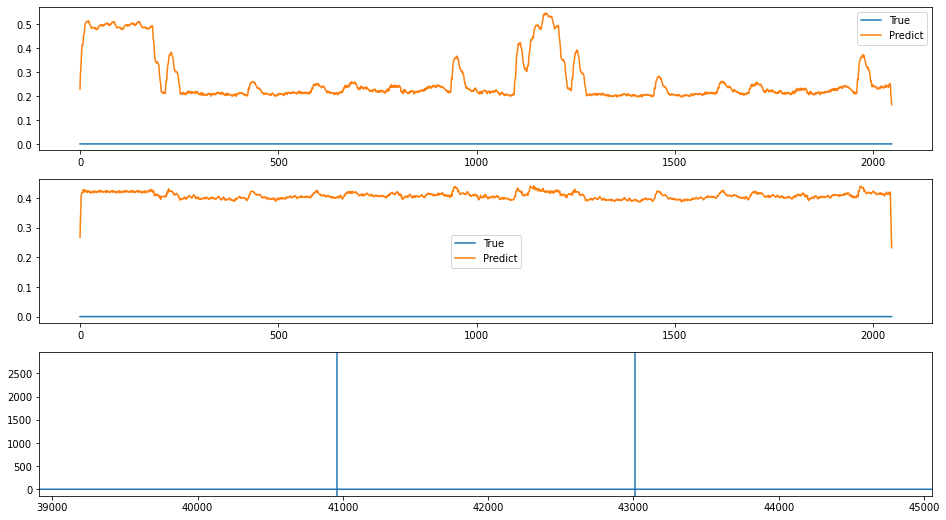

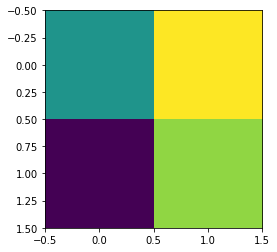

index: 370712
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6752
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-02 11:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...
n_bunches                                                     540
bunch_index                                                   648
bunch_number                                                  445
ts_length                                                   65536
chunk                                                           9
Name: 2497, dtype: object


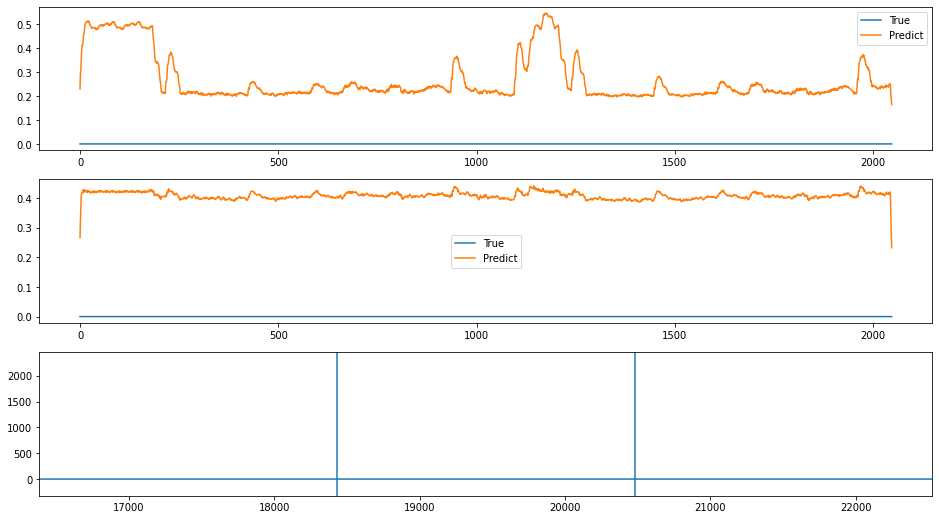

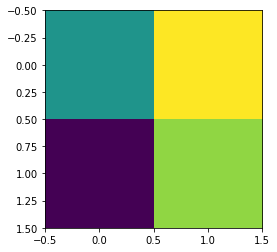

index: 285128
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:16:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                    1004
bunch_index                                                  1852
bunch_number                                                  995
ts_length                                                   65536
chunk                                                           2
Name: 746, dtype: object


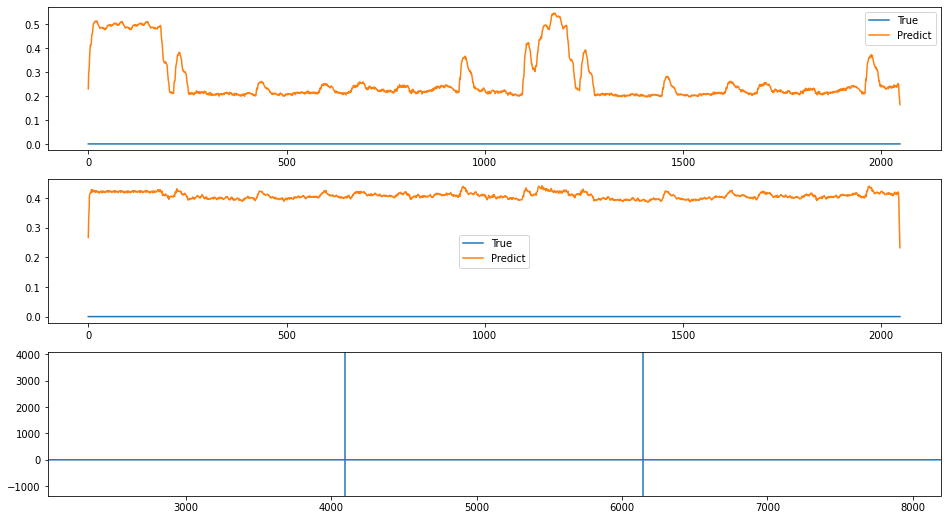

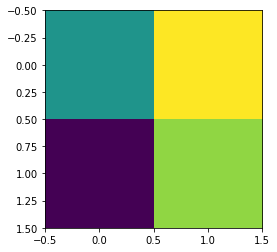

index: 25586
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6594
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-22 08:22:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6594/...
n_bunches                                                     157
bunch_index                                                  1133
bunch_number                                                  145
ts_length                                                   65536
chunk                                                           7
Name: 1928, dtype: object


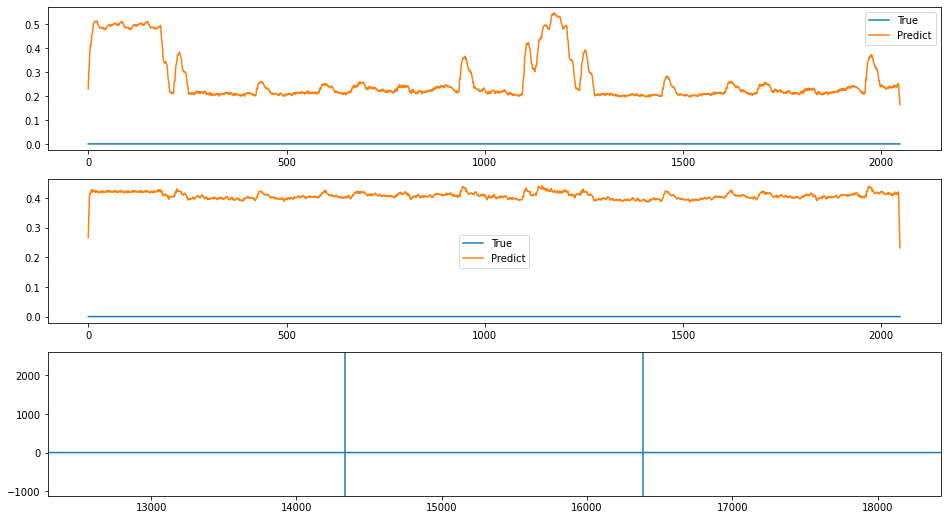

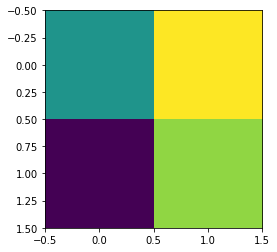

index: 17751
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     652
bunch_index                                                  1033
bunch_number                                                  547
ts_length                                                   65536
chunk                                                          25
Name: 6481, dtype: object


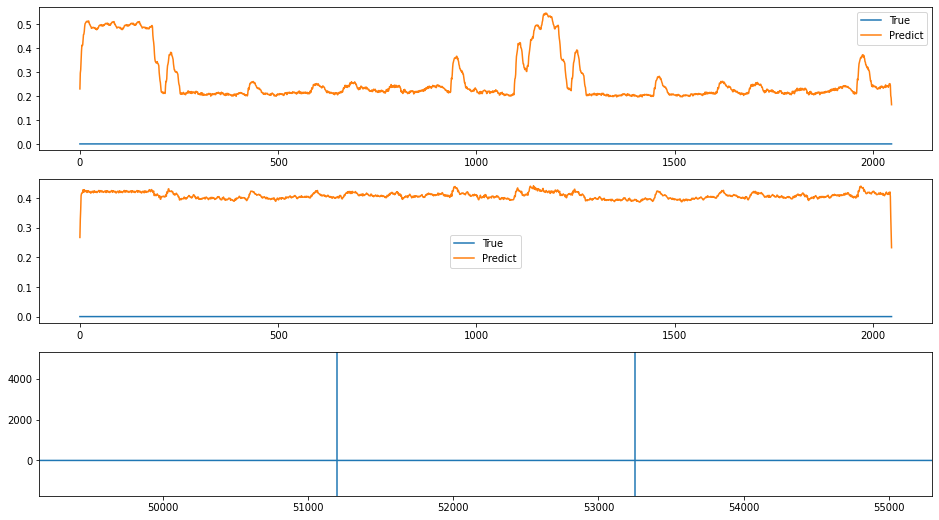

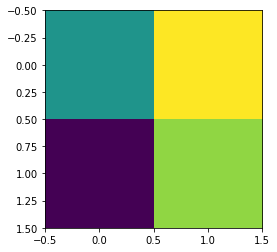

index: 351778
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:01:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     652
bunch_index                                                  1056
bunch_number                                                  559
ts_length                                                   65536
chunk                                                           4
Name: 1147, dtype: object


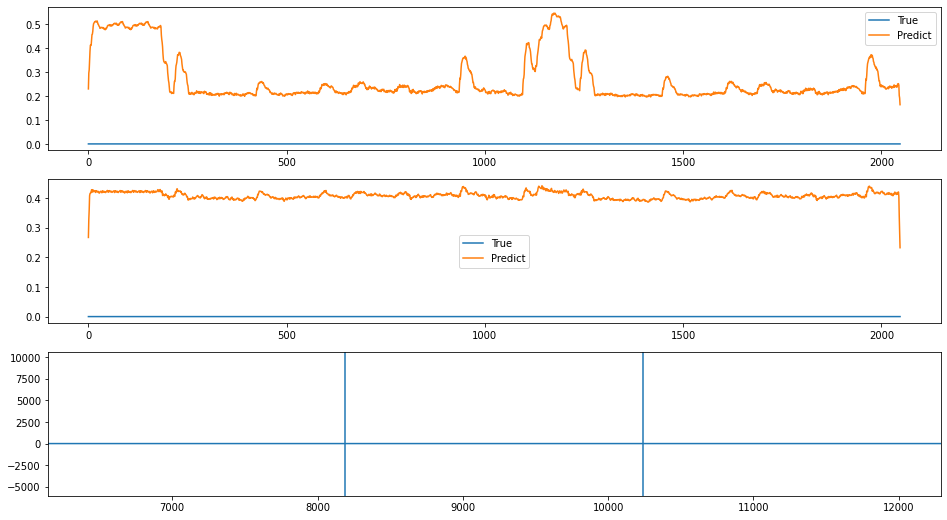

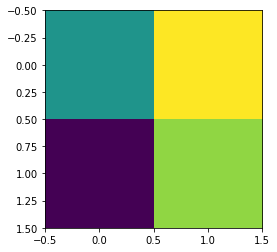

index: 285049
Error: 0.12307249981332502
type                                                         Inst
fill                                                         7453
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 06:39:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7453/...
n_bunches                                                     480
bunch_index                                                  2469
bunch_number                                                  462
ts_length                                                   65536
chunk                                                           7
Name: 2012, dtype: object


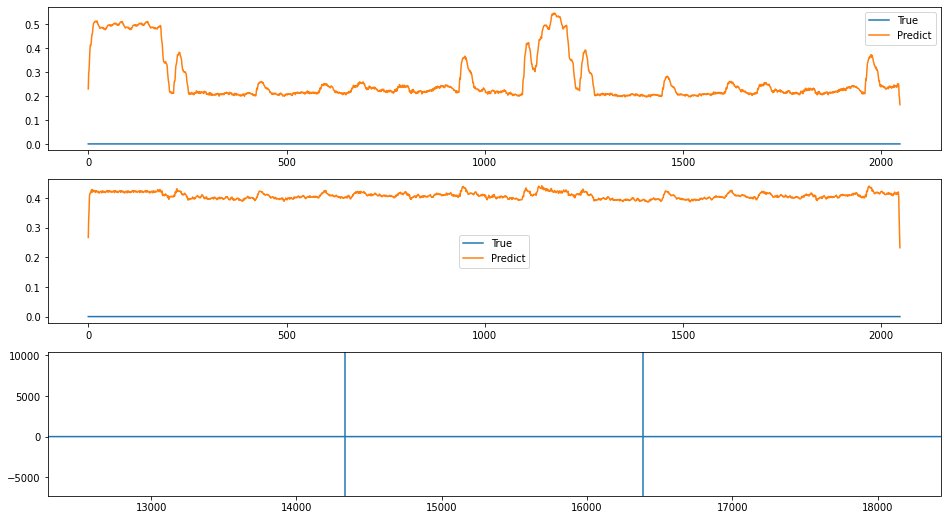

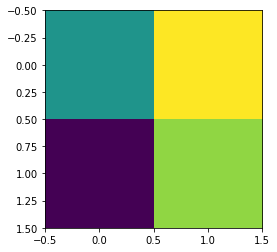

index: 17899
Error: 0.12307249981332502
type                                                         Inst
fill                                                         7128
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-06 03:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7128/...
n_bunches                                                     108
bunch_index                                                   117
bunch_number                                                   61
ts_length                                                   65536
chunk                                                          13
Name: 3547, dtype: object


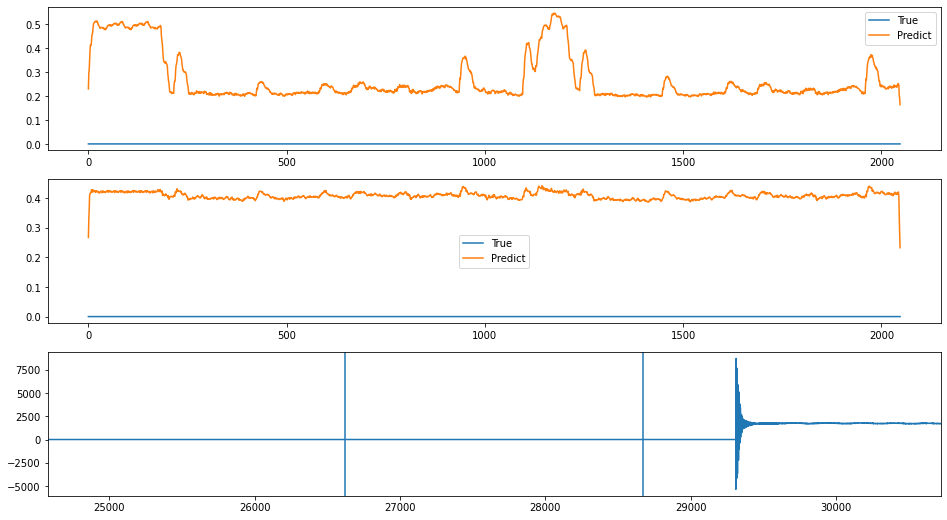

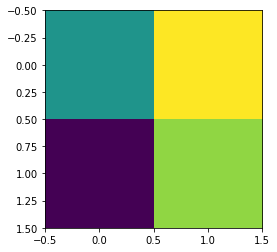

index: 351988
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:33:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                     300
bunch_index                                                   544
bunch_number                                                  299
ts_length                                                   65536
chunk                                                           2
Name: 745, dtype: object


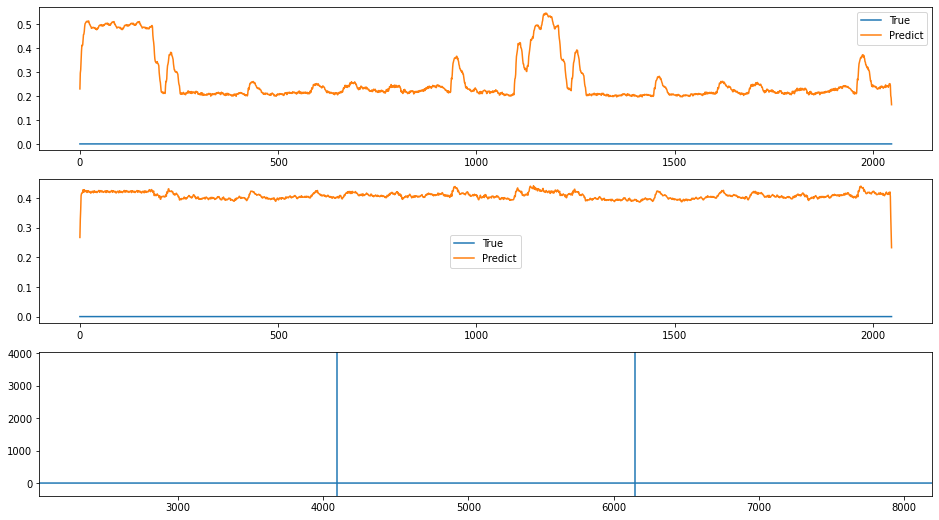

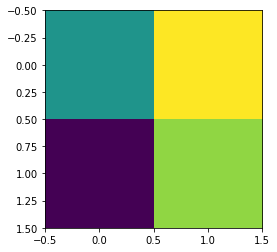

index: 371273
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6752
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-02 11:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...
n_bunches                                                     540
bunch_index                                                   648
bunch_number                                                  445
ts_length                                                   65536
chunk                                                          15
Name: 4033, dtype: object


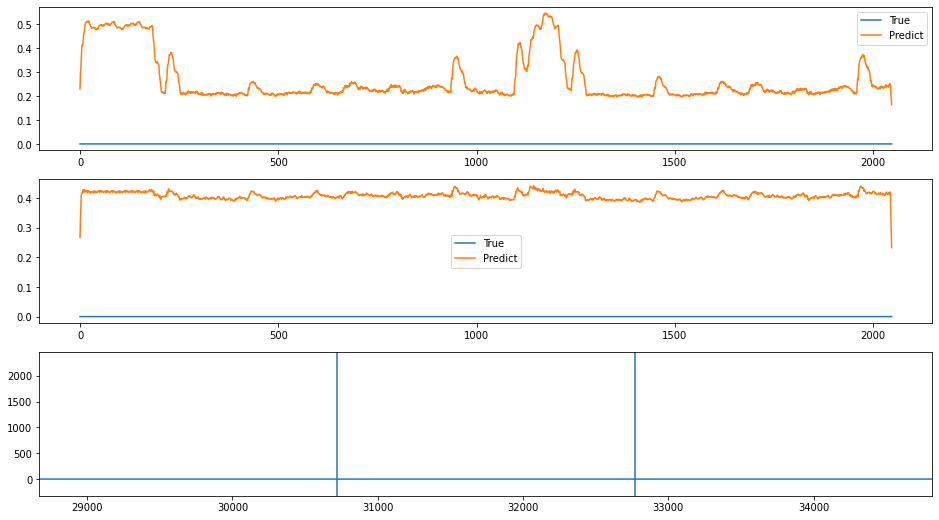

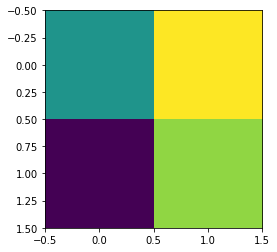

index: 284890
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 08:23:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1132
bunch_index                                                  2038
bunch_number                                                 1096
ts_length                                                   65536
chunk                                                           1
Name: 447, dtype: object


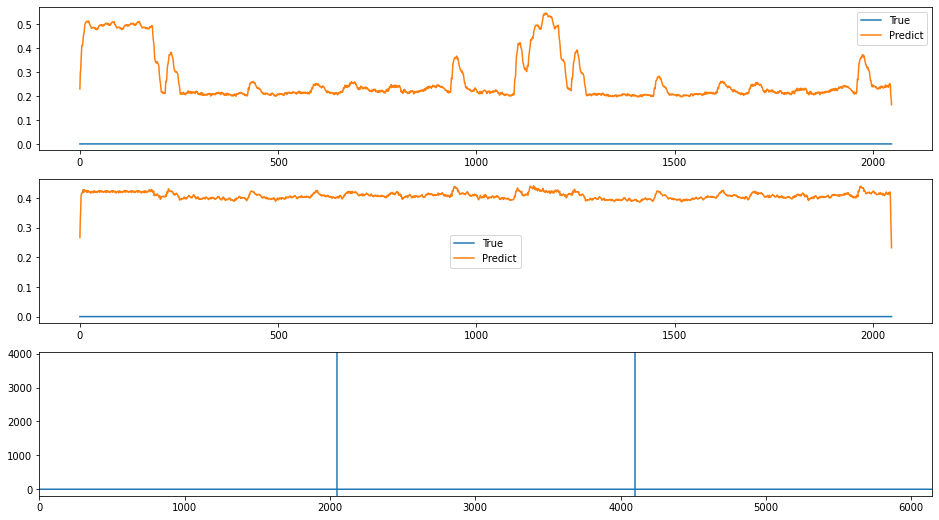

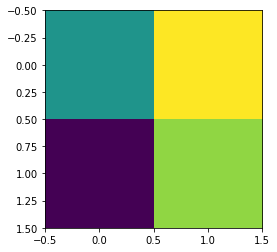

index: 352239
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                     588
bunch_index                                                  1130
bunch_number                                                  467
ts_length                                                   65536
chunk                                                          15
Name: 3951, dtype: object


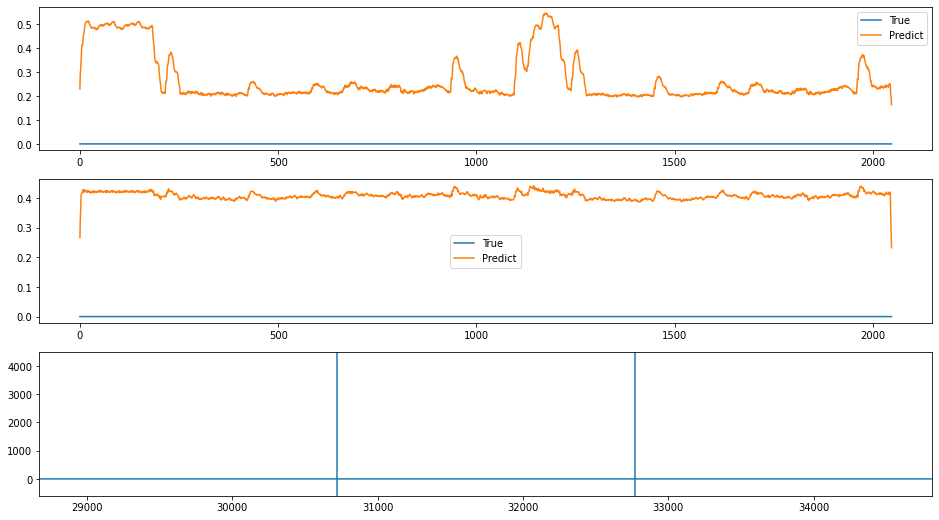

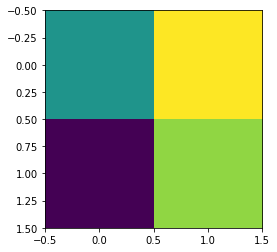

index: 352479
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                     588
bunch_index                                                  1130
bunch_number                                                  467
ts_length                                                   65536
chunk                                                           8
Name: 2159, dtype: object


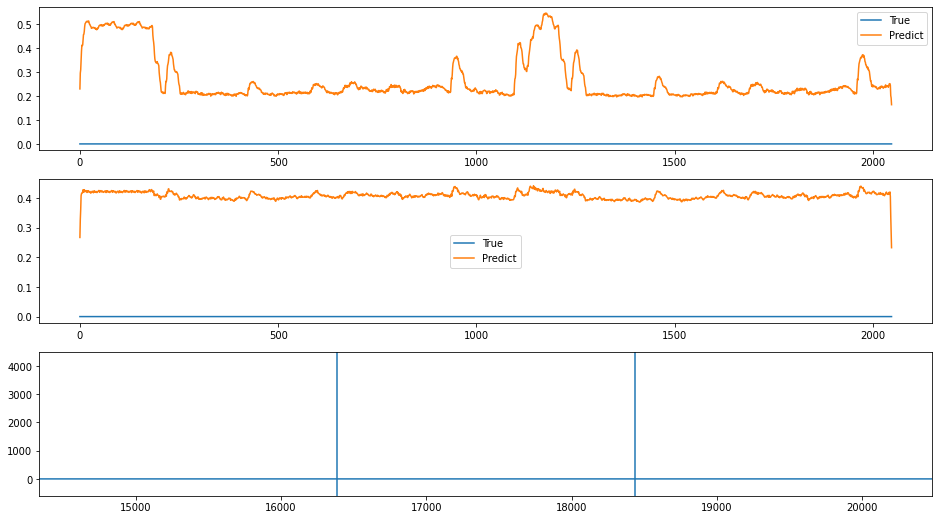

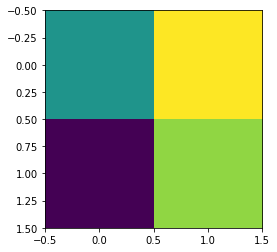

index: 352485
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 14:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                     588
bunch_index                                                  1130
bunch_number                                                  467
ts_length                                                   65536
chunk                                                           0
Name: 111, dtype: object


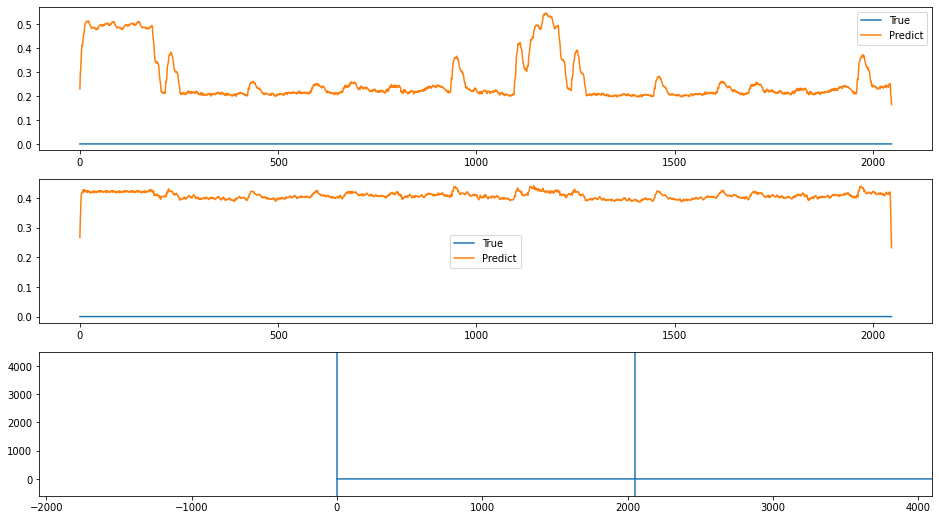

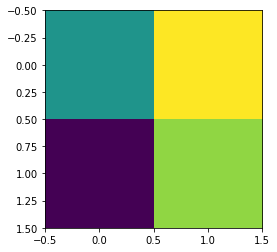

index: 284777
Error: 0.12307249981332502
type                                                         Inst
fill                                                         7453
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-18 06:39:06
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7453/...
n_bunches                                                     480
bunch_index                                                  2469
bunch_number                                                  462
ts_length                                                   65536
chunk                                                           4
Name: 1244, dtype: object


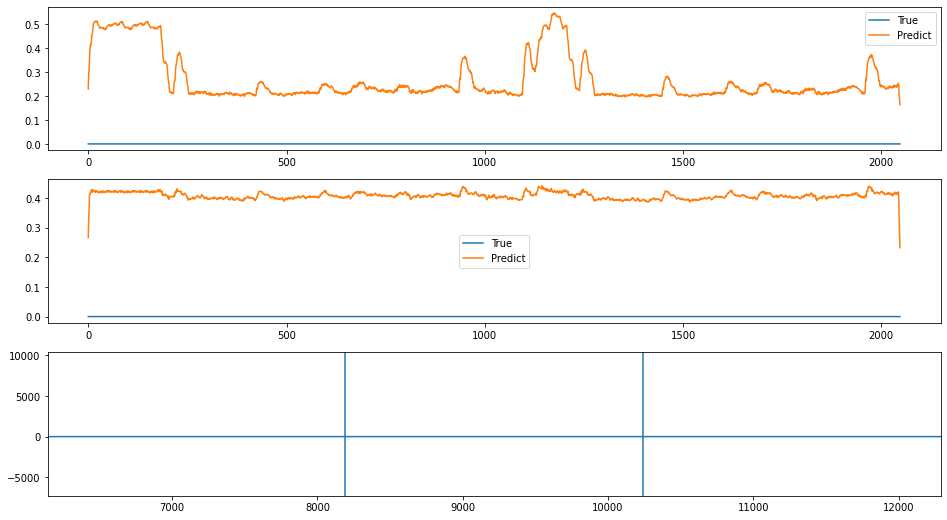

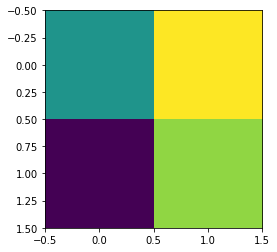

index: 352823
Error: 0.12307249981332502
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-06 23:01:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                     652
bunch_index                                                  1056
bunch_number                                                  559
ts_length                                                   65536
chunk                                                           5
Name: 1403, dtype: object


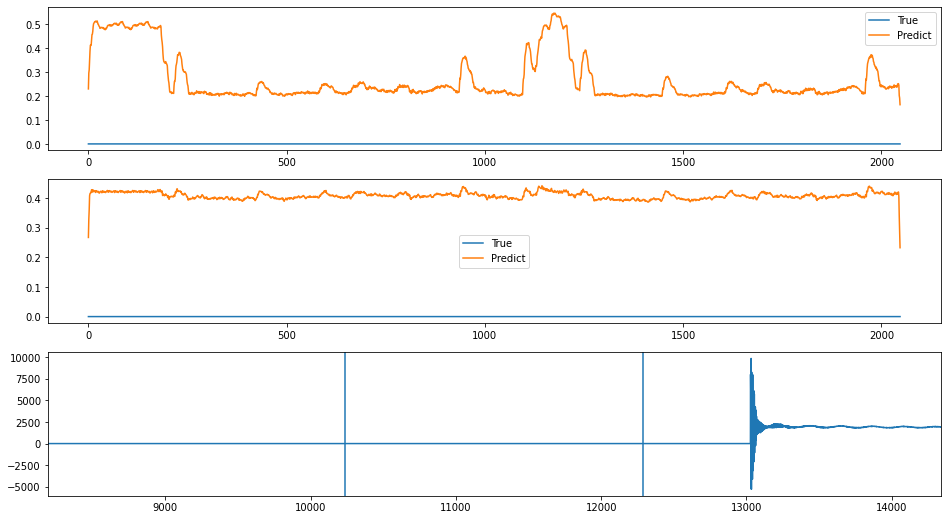

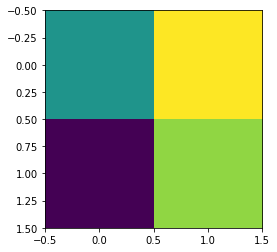

index: 317564
Error: 0.12307249981332502
type                                                         Inst
fill                                                         7480
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 22:45:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7480/...
n_bunches                                                     229
bunch_index                                                  1036
bunch_number                                                  217
ts_length                                                   65536
chunk                                                           2
Name: 557, dtype: object


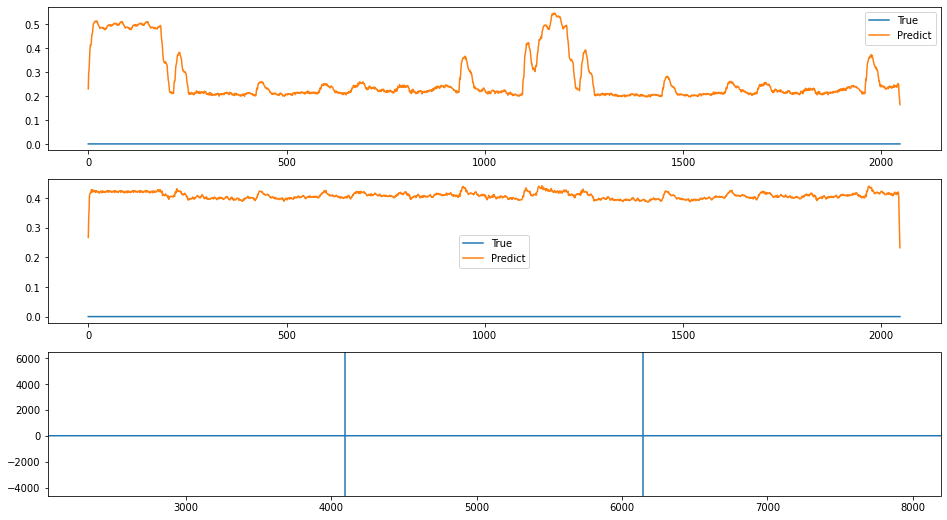

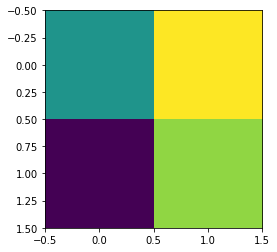

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 59838
Error: 0.03549771169132089
type                                                         Inst
fill                                                         6654
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-08 00:31:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6654/...
n_bunches                                                    2556
bunch_index                                                  2846
bunch_number                                                 2105
ts_length                                                   65536
chunk                                                           8
Name: 2175, dtype: object


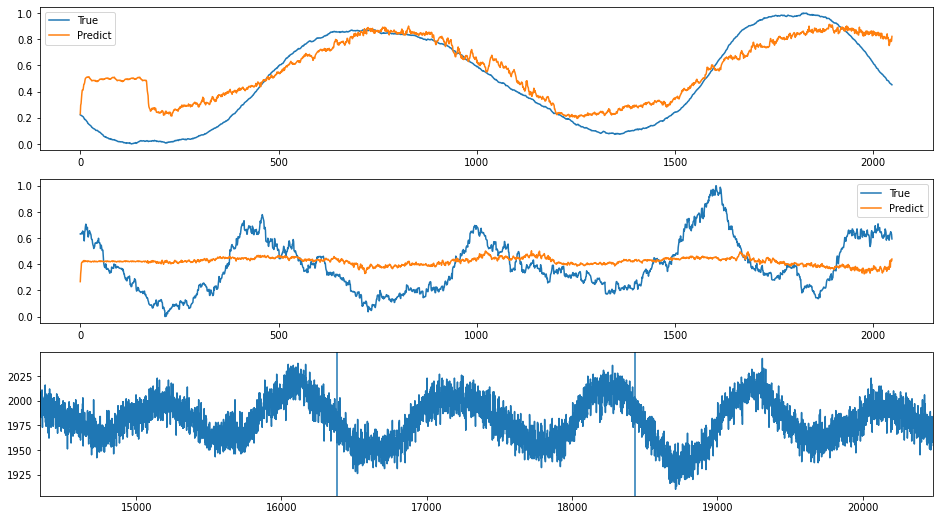

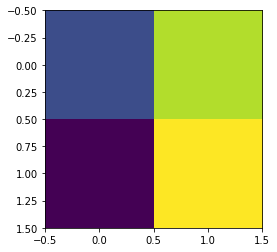

index: 344975
Error: 0.03549761160372171
type                                                         Inst
fill                                                         6688
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 22:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6688/...
n_bunches                                                     987
bunch_index                                                  1425
bunch_number                                                  443
ts_length                                                   65536
chunk                                                          15
Name: 4076, dtype: object


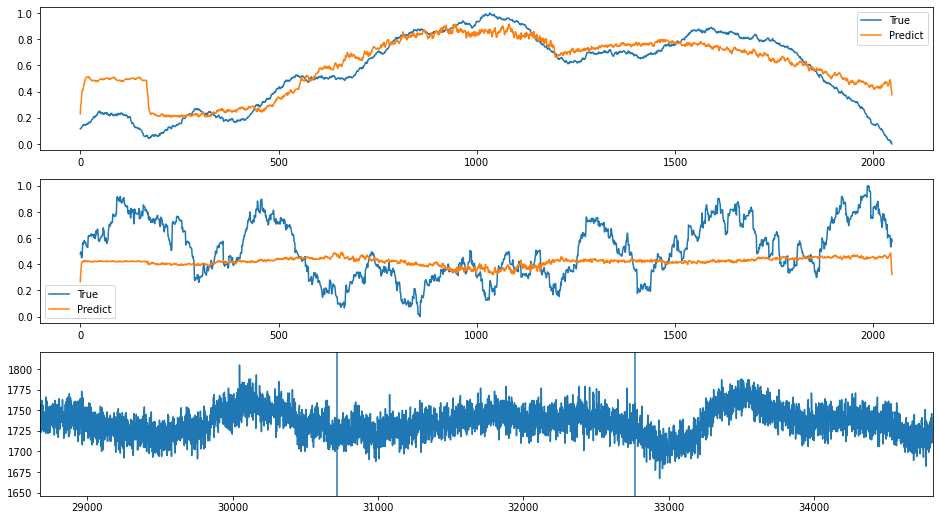

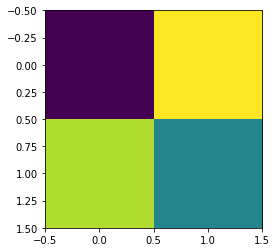

index: 257962
Error: 0.03549759542895524
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 03:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                    1868
bunch_index                                                   696
bunch_number                                                  378
ts_length                                                   65536
chunk                                                           5
Name: 1397, dtype: object


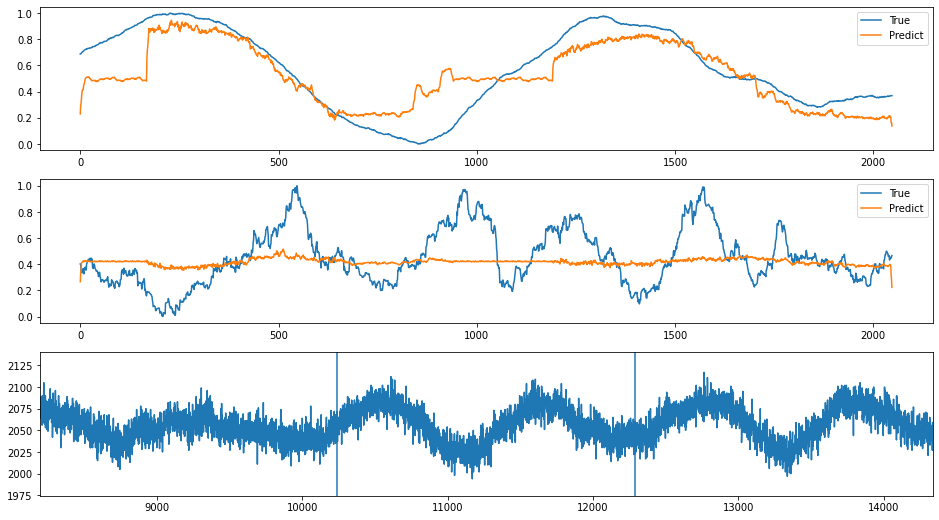

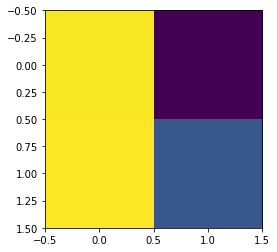

index: 52680
Error: 0.035497774565887374
type                                                         Inst
fill                                                         6860
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 17:35:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6860/...
n_bunches                                                    2460
bunch_index                                                  1591
bunch_number                                                 1168
ts_length                                                   65536
chunk                                                          19
Name: 4980, dtype: object


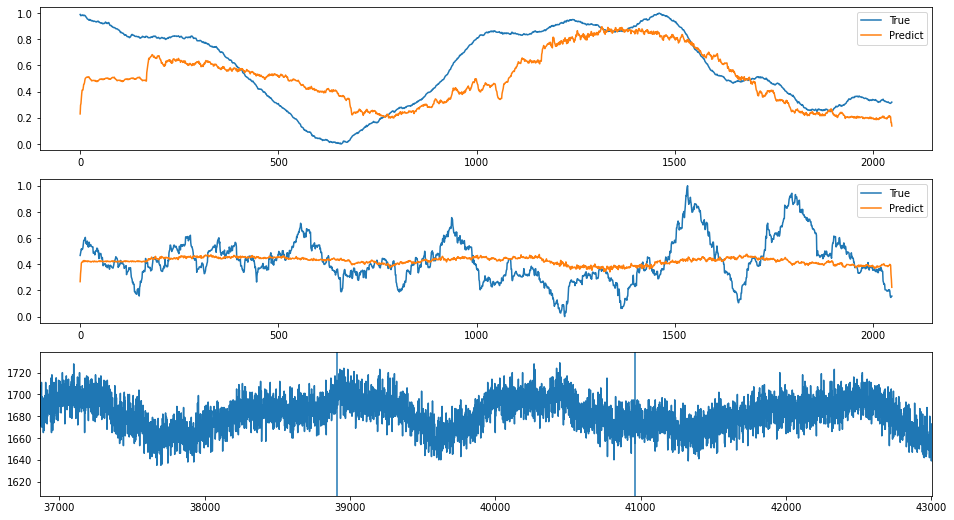

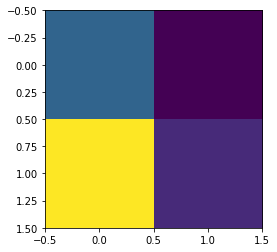

index: 60560
Error: 0.03549756506046771
type                                                         Inst
fill                                                         6937
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 17:01:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6937/...
n_bunches                                                    1068
bunch_index                                                  1166
bunch_number                                                  850
ts_length                                                   65536
chunk                                                          12
Name: 3138, dtype: object


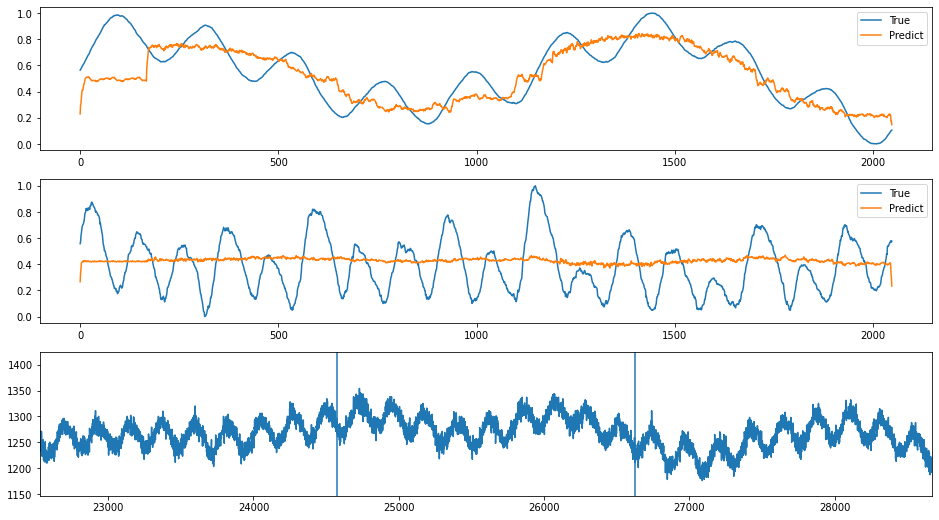

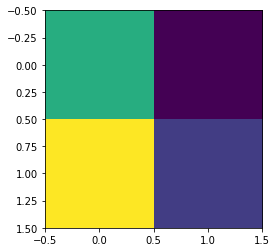

index: 31408
Error: 0.035497563935111595
type                                                         Inst
fill                                                         7124
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-04 06:57:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7124/...
n_bunches                                                    1068
bunch_index                                                    74
bunch_number                                                   25
ts_length                                                   65536
chunk                                                          15
Name: 3842, dtype: object


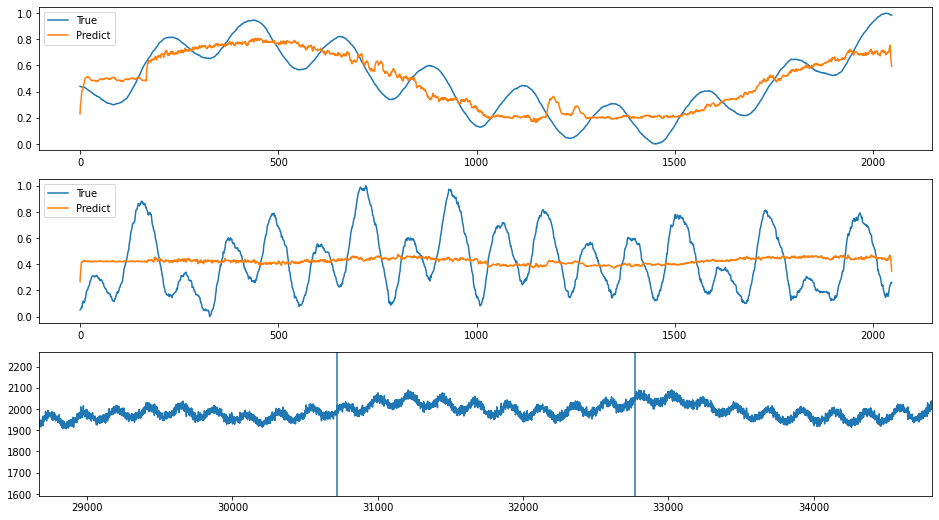

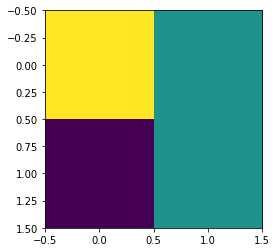

index: 312566
Error: 0.03549784134350557
type                                                         Inst
fill                                                         6617
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-27 15:30:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6617/...
n_bunches                                                     602
bunch_index                                                  1449
bunch_number                                                  460
ts_length                                                   65536
chunk                                                          13
Name: 3399, dtype: object


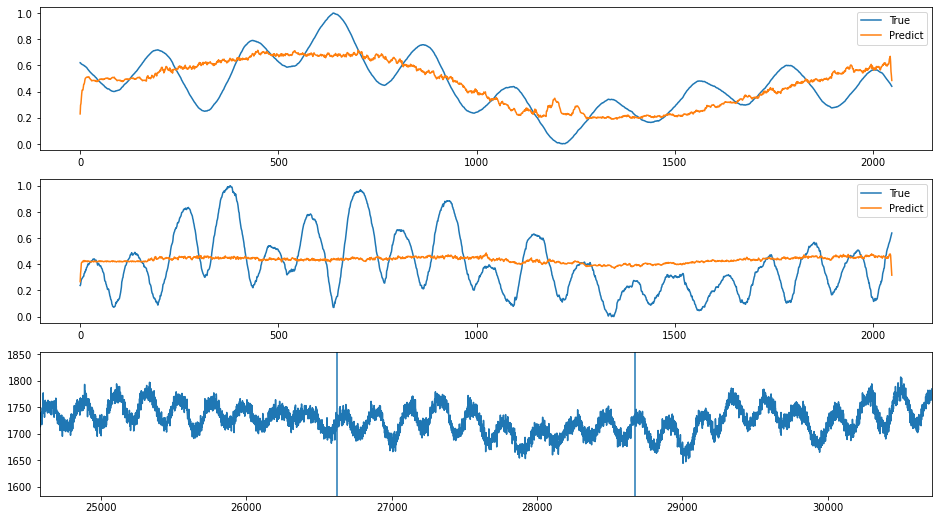

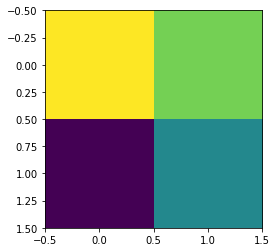

index: 951
Error: 0.035497860099667045
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 19:00:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     670
bunch_index                                                  2416
bunch_number                                                  509
ts_length                                                   65536
chunk                                                           2
Name: 554, dtype: object


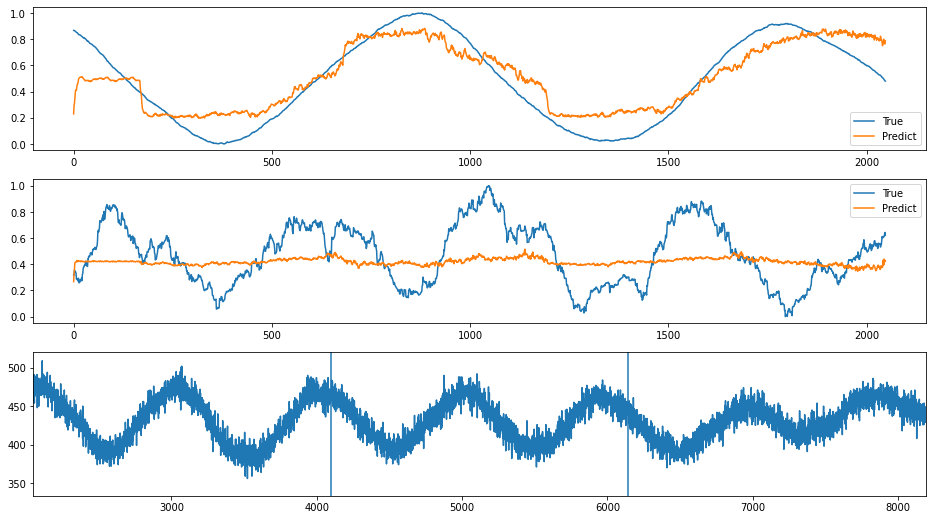

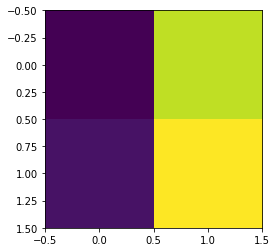

index: 257690
Error: 0.03549746119110435
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 15:57:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                    1452
bunch_index                                                  2096
bunch_number                                                  878
ts_length                                                   65536
chunk                                                           0
Name: 19, dtype: object


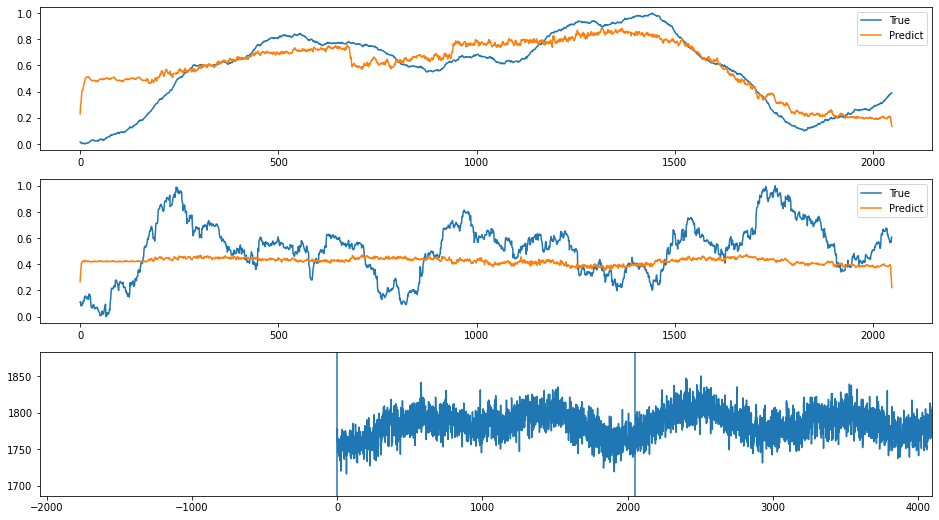

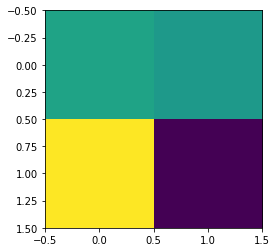

index: 260039
Error: 0.03549746116569115
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 17:48:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  3134
bunch_number                                                 2329
ts_length                                                   65536
chunk                                                           3
Name: 1017, dtype: object


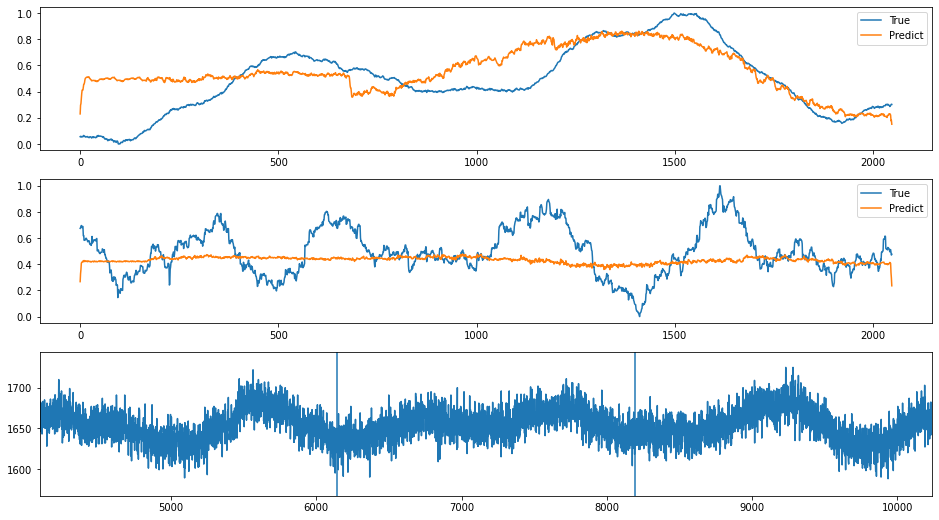

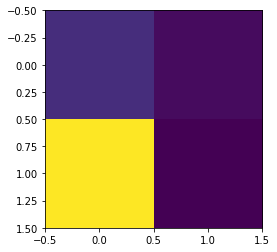

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 4)

In [34]:
print(encoded_2d[0])

[ 3.716658   6.0702496 19.840273  20.380322 ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

53.958916

In [37]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

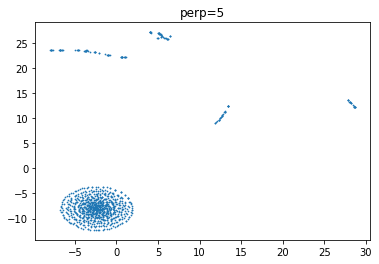

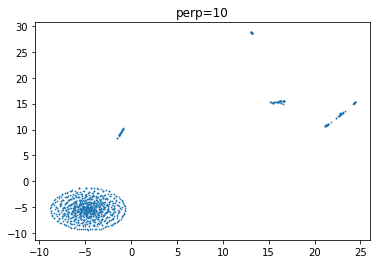

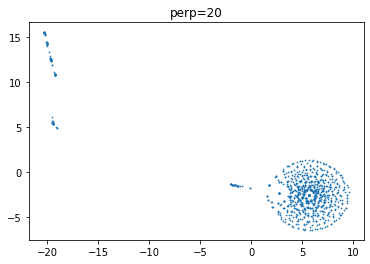

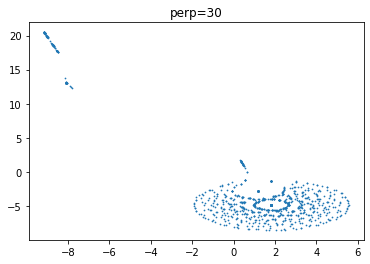

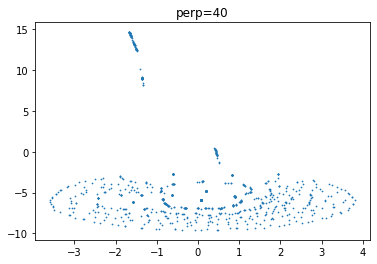

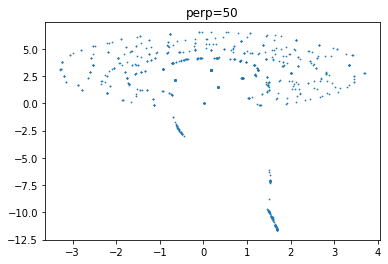

In [39]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()
    plot_avg_encoding(cluster_indices)
    plt.show()